In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import wlcave as wlcave #need to path correctly!
import matplotlib.cm as cm

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:174: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-112)),
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:53: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:54: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  epsneg_f80 = exp2(ld(-64))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  tiny_f80 = exp2(ld(-16382))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-63)),
C:\Users\tmhab\anaconda3\lib\site-packages\nump

## Import Files From Simulation:

In [4]:
file = "C:\\users/tmhab/wlcsim_membrane/data/2.10.21_NoInteractions_2hrs_r11v0.txt"
data = np.loadtxt(file) #D:\\myfiles\welcome.txt


## Our Approach to Calculating Percolation Paths Through a Polymer Membrane:

### Defining The System:

In our system we have random copolymers with solvent molecules. Polymers are represented by beads of types 1 and 2 and solvent molecules are individual beads of type 0. No bead can overlap another. 

### Defining Percolation:

A percolation is a pathway through the polymer network that solvent molecules can move through. To form a percolation a solvent molecule will need to have at least one other solvent molecule adjacent to it within some path radius $r$

### What are we trying to learn from the system:

The goal in developing this code is to determine quantitatively the amount of percolation in a membrane. 

### Models for Percolation:
**1. Fire Spread Model:** In this model we measure the percolation paths by tracing the spots where the solvent molecules continue to be adjacent to the previous... It's easier to explain with a picture

## What we need to calculate:

Starting with the final equilibrium state we have x,y,z postion of a bead and it's identity (and also methylation state). We want to calculate percolation paths which will be represented by root mean square. 

#### What Percolation Model do we want to use:

1. Fire spead model:

Proceedure:
1. Pick a bead type
2. pick a random bead of that bead type
3. Check surround bead types to see if they are the same
    a. Pick a radius to search in


# Note: for some reason if you declare two different PolymerNetworks, they can interfere w/ each other (change values)

In [5]:
def generate_test_data(length=10,width=10,height=10,datapoints=500):
    X = np.random.random(datapoints)*length
    Y = np.random.random(datapoints)*width
    Z = np.random.random(datapoints)*height
    Beads = np.random.randint(1,size=(datapoints)).astype('uint8')
    Beads
    return X,Y,Z,Beads

#generate_test_data()

In [28]:
class Bead:
    '''
    '''
    def __init__(self, x, y, z, bead_type):
        self.x = x
        self.y = y
        self.z = z
        self.bead_type = bead_type
    
    def print_bead(self):
        print("x: ", self.x)
        print("Y: ", self.y)
        print("Z: ", self.z)
        


In [29]:
class Polymer:
    '''
    '''
    
    def __init__(self, bead_list):
        self.bead_list = bead_list
        bead_coor_array = np.zeros((len(bead_list), 3))
        bead_types = np.zeros(len(bead_list))
        for i, bead in enumerate(bead_list):
            bead_coor_array[i, 0] = bead.x
            bead_coor_array[i, 1] = bead.y
            bead_coor_array[i, 2] = bead.z
            bead_types[i] = bead.bead_type
        self.bead_coor_array = bead_coor_array
        self.bead_types = bead_types
    
    def print_bead_list(self):
        for i, bead in enumerate(self.bead_list):
            print("Bead " + str(i) + ": " + str(bead.x) + ", " + str(bead.y) + ", " + str(bead.z) + " Type: " + str(bead.bead_type))
   
    def find_center_of_mass(self,bead_num=0): 
        '''
        Find the center of mass for a given polymer chain wrt to a specific bead type
        '''
        X_bead = self.bead_coor_array[:,0][self.bead_types==bead_num] 
        Y_bead = self.bead_coor_array[:,1][self.bead_types==bead_num]
        Z_bead = self.bead_coor_array[:,2][self.bead_types==bead_num]
        
        x_center = np.mean(X_bead)
        y_center = np.mean(Y_bead)
        z_center = np.mean(Z_bead)
        
        return [x_center,y_center,z_center]
    
    def find_rg2(self): # INCORRECT- need to divid by total num of beads
        center_of_mass = self.find_center_of_mass()
        displacements = self.bead_coor_array - center_of_mass
        displacements_square = np.square(displacements)
        final_disp = np.sum(displacements_square, axis=1) #final disp square of sub polymer beads
        
        radius_g_2 = np.sum(final_disp)
        
        return radius_g_2
    
    def Radius_of_gyration_2(self,bead_num=0):
        center_of_mass_point = self.find_center_of_mass(bead_num)
        
        X_bead = self.bead_coor_array[:,0][self.bead_types==bead_num] 
        Y_bead = self.bead_coor_array[:,1][self.bead_types==bead_num]
        Z_bead = self.bead_coor_array[:,2][self.bead_types==bead_num]
        
        n = X_bead.shape[0]
        
        Rg2 = (np.sum((X_bead - center_of_mass_point[0])**2 + 
                    (Y_bead - center_of_mass_point[1])**2 + (Z_bead - center_of_mass_point[2])**2)/n)
        
        return Rg2

In [30]:
class PercolationPath:
    '''
    List of all beads that make a percolation path
    '''
    
    def __init__(self, beads_in_path=[]):
        self.beads_in_path = beads_in_path
        self.bead_coor_array = []
        self.bead_types = []
    
    def print_path(self):
        for i, bead in enumerate(self.beads_in_path):
            print("Bead " + str(i) + ": " + str(bead.x) + ", " + str(bead.y) + ", " + str(bead.z) + " Type: " + str(bead.bead_type))
    
    def make_bead_coor_array(self):
        bead_coor_array = np.zeros((len(self.beads_in_path), 3))
        bead_types = np.zeros(len(self.beads_in_path))
        for i, bead in enumerate(self.beads_in_path):
            bead_coor_array[i, 0] = bead.x
            bead_coor_array[i, 1] = bead.y
            bead_coor_array[i, 2] = bead.z
            bead_types[i] = bead.bead_type
        self.bead_coor_array = bead_coor_array
        self.bead_types = bead_types
        

In [31]:
class PolymerNetwork:
    """
    This represents the postions of bead and their type (time invariant)
    
    Parameters
    ----------
    X : float [array] X 
    """
    
    def __init__(self,X,Y,Z, Beads, beads_per_polymer=40, persistence_length=2.03, bead_list=[], polymer_list=[]):
        self.X = X
        self.Y = Y
        self.Z = Z
        self.Beads = Beads
        self.beads_per_polymer = beads_per_polymer
        self.bead_list = bead_list
        self.polymer_list = polymer_list
        self.persistence_length = persistence_length
        self.create_beads()
        self.create_polymers()
        
        self.density = Beads.shape[0]/((max(X)-min(X)) * (max(Y)-min(Y)) * (max(Z)-min(Z)))
        
    def visualize(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(self.X[Beads==0], self.Y[Beads==0], self.Z[Beads==0],color='y')
        ax.scatter3D(self.X[Beads==1], self.Y[Beads==1], self.Z[Beads==1],color='r')
        ax.scatter3D(self.X[Beads==2], self.Y[Beads==2], self.Z[Beads==2],color='b')
        
    def nearest_neighbor(self,bead_num,radius):
        '''
        Find the average number of beads that surround a bead of the same type within the radius specified
        '''
        X_bead = self.X[Beads==bead_num]
        Y_bead = self.Y[Beads==bead_num]
        Z_bead = self.Z[Beads==bead_num]
        
        total_neighbors = 0
        for i in range(Beads[Beads==bead_num].shape[0]):
            point = np.array([X_bead[i],Y_bead[i],Z_bead[i]])
            displacement = np.sqrt((X_bead - point[0])**2 + (Y_bead - point[1])**2 + (Z_bead - point[2])**2)
            num_neighbor_points = displacement[displacement<=radius].shape[0] -1
            
            total_neighbors += num_neighbor_points

        return total_neighbors/(i+1)
    
    def create_beads(self):
        #if not hasattr(self, "bead_list"):
        if len(self.bead_list) == 0:
            for i in range(len(self.X)):
                bead = Bead(self.X[i], self.Y[i], self.Z[i], self.Beads[i])
                self.bead_list.append(bead)
    
    def print_bead_list(self):
        for i, bead in enumerate(self.bead_list):
            print("Bead " + str(i) + ": " + str(bead.x) + ", " + str(bead.y) + ", " + str(bead.z) + " Type: " + str(bead.bead_type))
    
    def create_polymers(self):
        #if not hasattr(self, "polymer_list") and hasattr(self, "bead_list"):
        if len(self.polymer_list) == 0 & len(self.bead_list) != 0:
            for i in range(self.beads_per_polymer, len(self.bead_list) + 1, self.beads_per_polymer):
                polymer = Polymer(self.bead_list[i - self.beads_per_polymer : i])
                self.polymer_list.append(polymer)
        
    def print_polymer_list(self, verbose=False):
        for i, poly in enumerate(self.polymer_list):
            print("POLYMER " + str(i))
            if verbose:
                poly.print_bead_list()
    
    def visualize_percolation_paths(self,connection_radius,bead_num=0):
        #NEED TO MAKE MUCH FASTER!!!

        X_bead = self.X[self.Beads==bead_num]
        Y_bead = self.Y[self.Beads==bead_num]
        Z_bead = self.Z[self.Beads==bead_num]
        
        #Build array to see if a bead has been used in a percolation collection yet (True means it hasn't been used)
        ALL_PATHS = []  
        pathed_beads = []
        
#         bead = self.bead_list[4]
#         starting_path = PercolationPath([bead])
#         self.find_all_percolation_paths(starting_path, connection_radius, bead_num=0)
#         #print("beads in path: ", starting_path.print_path())
#         ALL_PATHS.append(starting_path)

#         ATTEMTPING TO START WITH ALMOST ALL BEADS
        baby_bead_list = self.bead_list[0:100]
        for i, bead in enumerate(baby_bead_list): # try all beads as starting bead to find percoaltion path
            print("on bead: ", i)
            print("pathed_beads", len(pathed_beads))
            if (bead not in pathed_beads): # no repeat beads
                starting_path = PercolationPath([bead])
                self.find_all_percolation_paths(starting_path, connection_radius, bead_num=0)
                #print("beads in path: ", starting_path.print_path())
                ALL_PATHS.append(starting_path)
                pathed_beads += starting_path.beads_in_path
        

        fig = plt.figure()
        ax = plt.axes(projection='3d')
        
        
        max_path = PercolationPath([])
        max_length = 0
        
        for path in ALL_PATHS:
            if len(path.beads_in_path) > len(max_path.beads_in_path):
                max_path = path
                max_length = len(max_path.beads_in_path)
            
        for path in ALL_PATHS:
            color = cm.rainbow(len(path.beads_in_path)/max_length - .01)
            path.make_bead_coor_array()
            X_vals = path.bead_coor_array[:, 0]
            Y_vals = path.bead_coor_array[:, 1]
            Z_vals = path.bead_coor_array[:, 2]
            ax.scatter3D(X_vals, Y_vals, Z_vals, color=color)
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        ax.set_zlim(0, 10)
        return len(ALL_PATHS)
    
    def find_all_percolation_paths(self, current_path, connection_radius, bead_num=0):
        '''
        Modifies current_path in place to be updated with all beads that make up a percolation path
        '''
        last_bead = current_path.beads_in_path[-1]
        avail_beads = self.find_available_beads(last_bead, connection_radius, bead_num=0)
        print("Last bead")
        print(last_bead.print_bead())
        print("Avail beads:")
        for bead in avail_beads:
            bead.print_bead()
            
        if (len(avail_beads) == 0):
            print()
            
        else:
            for bead in avail_beads:
                if bead not in current_path.beads_in_path:
                    #print("efore adding bead: ", current_path.print_path)
                    current_path.beads_in_path.append(bead)
                    #print("after adding bead: ", current_path.print_path)
                    self.find_all_percolation_paths(current_path, connection_radius)
            #return current_path
        
        
    def find_available_beads(self, bead, connection_radius, bead_num=0):
        '''
        return a list of beads w/in cononection radius
        '''
        print("stuck on avail beads?")
        available_beads = []
        displacement = np.sqrt((self.X - bead.x)**2 + (self.Y - bead.y)**2 + (self.Z - bead.z)**2)
        neighbor_beads_index = np.where([displacement<=connection_radius])[1]
        #print("neighbor_beads indices", neighbor_beads_index)
        #NEED TO FIND, OF THESE NEIGHBOR BEADS, WHICH IS THE FURTHEST
        for j in neighbor_beads_index:
            neighbor_bead = self.bead_list[j]
            if neighbor_bead.bead_type == bead_num:
                available_beads.append(neighbor_bead)
                
        return available_beads
    
    


In [19]:
lst = [0, 1, 2]
lst2 = [2, 3, 4]
lst += lst2
print(lst)

[0, 1, 2, 2, 3, 4]


In [10]:
'''
Determine the mean square interbead distance
Input: PolymerNetwork
       int skip_parameter: ratio of how many non-overlapping jumps of size d to skip when calculating the mean square 
       displacemnt between two beads distance d away. 1 means include all non-overlapping jumps,
       2 means every other, 3 means every third, etc.
Return: A DataFrame where the columns are a specific polymer in the network, rows are the number of "jumps" n,
        and the values are the average distance squared bewteen beads n jumps away (averaged over all different jumps 
        of size n possible in the polymer)
     <R^2> array of mean square end-to-end distances for all polymers with 0 to num_beads - 1 bonds
     non-dimensionalized by (2*l_p)^2
'''
def r2(polymer_network, skip_parameter=1):
    if len(polymer_network.bead_list) == 0:
        raise Exception("Need to run create_beads")
    if len(polymer_network.polymer_list) == 0:
        raise Exception("Need to run create_polymers")
    num_poly = len(polymer_network.polymer_list)
    avg_n_jumps = pd.DataFrame(index=range(polymer_network.beads_per_polymer), columns=range(num_poly))
    
    for i, poly in enumerate(polymer_network.polymer_list):
        # creating matrix of (inter-bead distances)^2 for a given polymer
        bead_dist = create_polymer_r2_table(poly)
        
        # get diagonals (non-overlapping jumps of size 0 - all beads), avg, store in the dataframe
        avg_n_jumps[i] = get_avg_jump_distances(poly, bead_dist, skip_parameter)
        
        if (i % 250 == 0):
            print("processed polymer " + str(i))
    
    #average the distance b/w chain ends, normailize (???)
    num_beads = polymer_network.beads_per_polymer
    r2_ave_vect = np.zeros(num_beads)
    for i in range(num_beads):
        row_avg = np.average(avg_n_jumps.iloc[i]) # average size i jump over all polymers
        r2_ave_vect[i] = row_avg
    
    #print("r2_ave before normalization = " + str(np.average(avg_n_jumps.iloc[num_beads-1])))
    #r2_ave = np.average(avg_n_jumps.iloc[num_beads-1])/(2 * polymer_network.persistence_length)**2
    
    return r2_ave_vect, avg_n_jumps

'''
Creates a 2D array with the square distance from each bead to each other bead in a polymer.
Inputs: Polymer class
Returns: 2D array of square distances
'''
def create_polymer_r2_table(polymer):
    num_beads = len(polymer.bead_list)
    bead_dist = np.zeros((num_beads, num_beads))
    for i, bead in enumerate(polymer.bead_coor_array):
        displacements = polymer.bead_coor_array - bead
        displacements_square = np.square(displacements)
        final_disp = np.sum(displacements_square, axis=1)
        bead_dist[i, :] = final_disp

    return bead_dist

'''
Given a 2D array of square bead displacements, this function finds the average square distance of all 
non overlapping jumps, for all possible jump sizes. 
Inputs: Polymer
        polymer_bead_dist- 2D array of bead square displacements
        skip_parameter- ratio of how many non-overlapping jumps of size d to skip. 1 means include all non-overlapping
        jumps, 2 means every other, 3 means every third, etc.
Returns: n_jump_dist_avg- a 1D array where the index i corresponds to the average square displacement of a jump size i
'''
def get_avg_jump_distances(polymer, polymer_bead_dist, skip_parameter):
    num_beads = len(polymer.bead_list)
    n_jump_dist_avg = np.zeros(num_beads)
    for d in range(num_beads):   # for all jump sizes
            diag = np.diag(polymer_bead_dist, d) # get jumps of size d
            if d == 0:
                n_jump_dist_avg[d] = np.average(diag)
            else:
                n_jump_dist_avg[d] = np.average(diag[::skip_parameter*d])  # average all non-overlapping jumps
    return n_jump_dist_avg    

In [11]:
# #TEST DATA:

# X,Y,Z,Beads = generate_test_data(datapoints = 100)
# PNet_Test = PolymerNetwork(X,Y,Z,np.zeros(len(X)), beads_per_polymer = 1)
# PNet_Test.density

In [12]:
# PNet_Test.visualize()

In [13]:
# PNet_Test.visualize_percolation_paths(1.6)
# PNet_Test.nearest_neighbor(bead_num=0,radius=0.4)
# polym = PNet_Test.polymer_list[0]
# polym.print_bead_list()
# print(polym.find_center_of_mass())
# print(polym.Radius_of_gyration())

In [14]:
#radii = np.linspace(0,15,100)
#for r in radii:
#    plt.plot(r,PNet_Test.nearest_neighbor(bead_num=0,radius=r),'y.')
#plt.xlabel('Radius')
#plt.ylabel('Average Number of Neighbor Points')

In [15]:
#x = r2(PNet_Test)
#x  # roughly random dist (no polymer chain)

In [32]:
#REAL DATA:

beads = np.zeros(len(data[:, 0]))   # no chemical identity data
no_interactions = PolymerNetwork(data[:, 0], data[:, 1], data[:, 2], beads, beads_per_polymer=40)


C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [33]:
no_interactions.visualize_percolation_paths(0.9)

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:158: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:158: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:158: RuntimeWarning: divide by zero encountered in add
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:158: RuntimeWarning: divide by zero encountered in sqrt
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: divide by zero encountered in less_equal


on bead:  0
pathed_beads 0
stuck on avail beads?
Last bead
x:  13.2876658
Y:  19.7803606
Z:  2.4993093
None
Avail beads:
x:  13.2876658
Y:  19.7803606
Z:  2.4993093
x:  13.1093602
Y:  19.9716731
Z:  2.7742896
x:  12.8981272
Y:  20.0511172
Z:  3.0831848
x:  13.6100789
Y:  19.1707789
Z:  2.9812747
x:  13.7088827
Y:  19.1140919
Z:  2.6388387
x:  13.5241106
Y:  19.2718815
Z:  3.1545717
x:  13.6096694
Y:  19.0022553
Z:  2.7272726
x:  13.2532497
Y:  19.8150972
Z:  3.1994498
x:  13.2532558
Y:  19.4294065
Z:  3.1793321
x:  13.1990254
Y:  19.9158687
Z:  3.3078999
x:  13.3649676
Y:  19.4936522
Z:  3.3208815
x:  12.6646224
Y:  20.2725785
Z:  2.6558059
x:  13.0061425
Y:  20.3149101
Z:  2.4655192
x:  13.1507475
Y:  20.4132168
Z:  2.0449735
stuck on avail beads?
Last bead
x:  13.1093602
Y:  19.9716731
Z:  2.7742896
None
Avail beads:
x:  13.2876658
Y:  19.7803606
Z:  2.4993093
x:  13.1093602
Y:  19.9716731
Z:  2.7742896
x:  12.8981272
Y:  20.0511172
Z:  3.0831848
x:  12.6074577
Y:  19.988955
Z:  3.40

Z:  4.2210823
x:  11.983951
Y:  19.3068899
Z:  4.6549294
x:  11.8462407
Y:  19.6010476
Z:  4.9212436
x:  12.2706558
Y:  18.662603
Z:  4.2658382
x:  12.3481429
Y:  18.8197421
Z:  4.6349643
x:  12.5164202
Y:  19.076821
Z:  5.0731412
stuck on avail beads?
Last bead
x:  12.5628826
Y:  19.0144281
Z:  4.4417629
None
Avail beads:
x:  11.787253
Y:  19.3327131
Z:  4.716049
x:  12.1956342
Y:  19.1113081
Z:  4.6120572
x:  12.5628826
Y:  19.0144281
Z:  4.4417629
x:  12.888801
Y:  18.7490146
Z:  4.4606985
x:  13.1810858
Y:  18.6989996
Z:  4.6809283
x:  13.2184626
Y:  18.7522333
Z:  4.4146807
x:  13.1342396
Y:  18.9436408
Z:  4.069776
x:  12.4055457
Y:  19.6198077
Z:  4.9981111
x:  12.4371102
Y:  19.318525
Z:  5.1714262
x:  12.6823011
Y:  19.0039997
Z:  5.2199269
x:  12.0562397
Y:  18.4006328
Z:  4.6264756
x:  12.3982576
Y:  18.3006834
Z:  4.0438441
x:  12.7082572
Y:  18.4616421
Z:  4.2301862
x:  12.7976893
Y:  18.7233448
Z:  4.1812149
x:  13.0473038
Y:  18.871916
Z:  4.1026432
x:  13.3242834
Y:  19

x:  14.516407
Y:  19.0280211
Z:  5.4461757
x:  14.202763
Y:  19.2491706
Z:  5.3943804
stuck on avail beads?
Last bead
x:  14.443489
Y:  18.7038337
Z:  4.6349355
None
Avail beads:
x:  13.9169722
Y:  18.5532059
Z:  4.7433368
x:  14.20206
Y:  18.6746978
Z:  4.7121879
x:  14.443489
Y:  18.7038337
Z:  4.6349355
x:  14.8223875
Y:  18.5506222
Z:  4.526304
x:  14.9622838
Y:  18.3288534
Z:  4.1857301
x:  14.2957602
Y:  18.2345718
Z:  3.9933015
x:  14.3583768
Y:  18.3882851
Z:  4.4252188
x:  14.3557242
Y:  18.5857691
Z:  4.7520268
x:  14.148884
Y:  18.7720069
Z:  5.0057685
x:  13.9011412
Y:  18.9724098
Z:  5.1909135
x:  14.9819056
Y:  19.1230118
Z:  4.1574072
x:  15.0778983
Y:  18.3804419
Z:  4.1009971
x:  13.7528796
Y:  18.7245956
Z:  5.0082166
x:  13.6397522
Y:  18.9158804
Z:  4.6811812
x:  13.718605
Y:  18.885293
Z:  4.3222556
x:  15.1341169
Y:  18.6539107
Z:  4.9082048
x:  14.967201
Y:  18.6701836
Z:  5.2143875
x:  14.2417429
Y:  17.9785789
Z:  4.2145393
x:  14.3039554
Y:  18.371473
Z:  4.22

Z:  4.5891376
x:  15.8891476
Y:  17.2782128
Z:  4.7837682
x:  15.5964607
Y:  17.2050183
Z:  4.5168403
x:  15.3886234
Y:  17.17605
Z:  4.2171067
stuck on avail beads?
Last bead
x:  14.8669396
Y:  16.5653663
Z:  5.1783347
None
Avail beads:
x:  15.3880983
Y:  17.130759
Z:  4.7628353
x:  15.1887155
Y:  16.8493475
Z:  5.0134024
x:  14.8669396
Y:  16.5653663
Z:  5.1783347
x:  14.671042
Y:  16.5565276
Z:  5.4903577
x:  14.747188
Y:  16.5845224
Z:  5.7678033
x:  14.9788968
Y:  15.7327141
Z:  5.2913637
x:  14.8358241
Y:  15.8390816
Z:  5.585925
x:  14.8278632
Y:  16.4632436
Z:  5.3242354
x:  14.718721
Y:  16.0958048
Z:  5.2429994
x:  14.6077132
Y:  15.720709
Z:  5.322164
x:  14.511863
Y:  15.964457
Z:  5.3598706
x:  14.6959784
Y:  16.2218319
Z:  5.7069668
x:  14.8739207
Y:  16.53152
Z:  5.7228314
x:  14.9589908
Y:  16.8898802
Z:  5.8713267
x:  15.4907438
Y:  17.0423492
Z:  5.0093332
x:  15.2799898
Y:  16.7840916
Z:  4.686244
x:  14.9553523
Y:  16.8365432
Z:  4.5931028
x:  14.2649595
Y:  16.0443

Last bead
x:  15.4116338
Y:  16.0314756
Z:  7.2859996
None
Avail beads:
x:  14.9740187
Y:  16.2227404
Z:  6.7666193
x:  15.1034403
Y:  16.2055323
Z:  7.0152655
x:  15.4116338
Y:  16.0314756
Z:  7.2859996
x:  15.6010646
Y:  15.9175124
Z:  7.6697015
x:  15.807682
Y:  15.6232023
Z:  7.8795277
x:  15.9064047
Y:  15.7446979
Z:  6.6198505
x:  15.6520509
Y:  15.4629037
Z:  6.7094877
x:  15.1744988
Y:  15.7144615
Z:  6.5462087
x:  15.0744748
Y:  16.1606486
Z:  6.771423
x:  14.7902357
Y:  15.6789365
Z:  6.998646
x:  15.0410591
Y:  15.5217058
Z:  7.1991135
x:  15.1637253
Y:  15.235057
Z:  7.4174771
x:  14.6036196
Y:  15.9705925
Z:  7.0692806
x:  15.02368
Y:  16.0587952
Z:  7.1093309
x:  15.4364132
Y:  16.1844863
Z:  7.3207027
x:  15.6386312
Y:  16.2227257
Z:  7.6622755
x:  15.7204018
Y:  16.0458489
Z:  7.999615
x:  14.6916588
Y:  15.8771651
Z:  7.2751375
x:  14.9406944
Y:  16.0970626
Z:  7.6083633
x:  15.160038
Y:  16.2056218
Z:  7.9297941
x:  14.9283144
Y:  15.7433828
Z:  7.8214486
x:  15.28103

x:  17.9586985
Y:  16.4024264
Z:  8.0557311
x:  17.9871234
Y:  16.7680664
Z:  8.2188004
x:  18.0490869
Y:  17.0747289
Z:  8.3909624
x:  18.0205038
Y:  16.5677268
Z:  8.6770499
x:  17.8415362
Y:  16.5554359
Z:  8.4804813
x:  17.5385744
Y:  16.5159406
Z:  8.2705212
x:  17.2553358
Y:  16.4297263
Z:  8.0203754
x:  17.1191594
Y:  16.6587648
Z:  7.8901336
x:  17.0706362
Y:  17.0562046
Z:  7.723126
x:  16.8532791
Y:  16.8438727
Z:  7.6607638
x:  18.2499942
Y:  16.4702405
Z:  8.4084661
x:  18.0851313
Y:  16.4739138
Z:  8.0196598
x:  17.8649134
Y:  16.5319464
Z:  7.6362582
x:  17.2545826
Y:  17.2660258
Z:  8.8462985
x:  17.3657358
Y:  17.3528183
Z:  8.5240516
x:  17.2377607
Y:  16.3694267
Z:  9.1062002
x:  17.5439172
Y:  16.5760281
Z:  8.9176658
x:  17.8393159
Y:  16.5300205
Z:  8.7704133
stuck on avail beads?
Last bead
x:  16.5371044
Y:  16.6306143
Z:  8.2715895
None
Avail beads:
x:  16.8998532
Y:  16.0755918
Z:  7.9101582
x:  17.1250522
Y:  16.3091367
Z:  8.1407616
x:  17.4336705
Y:  16.64707

x:  17.6700963
Y:  17.6595849
Z:  4.0178338
x:  17.9318407
Y:  17.5023871
Z:  4.1903614
x:  18.0827522
Y:  17.1973328
Z:  4.4112674
x:  18.1218003
Y:  16.88447
Z:  4.5339913
x:  18.1866952
Y:  16.8522746
Z:  4.6411492
x:  17.9881462
Y:  17.178179
Z:  4.9571103
x:  17.9919901
Y:  17.3646085
Z:  5.3061364
x:  18.0855812
Y:  17.786331
Z:  5.4259635
x:  18.1546383
Y:  18.1202066
Z:  5.1619614
x:  18.1453214
Y:  17.7186502
Z:  4.6021165
x:  18.2759135
Y:  17.5280046
Z:  4.4104745
x:  18.5125823
Y:  17.6097436
Z:  4.1229158
x:  18.0065916
Y:  18.2313425
Z:  4.4681734
x:  17.1573036
Y:  17.6420457
Z:  4.2823446
x:  17.1741081
Y:  17.7937088
Z:  4.7604318
x:  17.2737066
Y:  17.6064695
Z:  5.1848018
stuck on avail beads?
Last bead
x:  17.7733833
Y:  17.0920588
Z:  4.4611979
None
Avail beads:
x:  17.7346671
Y:  16.4787272
Z:  3.8958551
x:  17.7296482
Y:  16.6998365
Z:  4.1858879
x:  17.7733833
Y:  17.0920588
Z:  4.4611979
x:  17.8973387
Y:  17.4729078
Z:  4.6364674
x:  17.6700963
Y:  17.6595849


x:  18.4309653
Y:  16.2033077
Z:  0.6863099
x:  18.2974265
Y:  16.4024195
Z:  0.302034
x:  17.6523196
Y:  16.1544784
Z:  0.2998348
x:  17.5874766
Y:  16.2257163
Z:  0.625519
x:  17.7151776
Y:  15.5641725
Z:  1.693856
x:  17.1635497
Y:  15.8207773
Z:  1.1019436
x:  17.2477719
Y:  16.1528195
Z:  0.9830505
x:  18.1486376
Y:  15.2302762
Z:  1.2501044
x:  18.3034003
Y:  15.1525915
Z:  0.9868653
stuck on avail beads?
Last bead
x:  17.5744892
Y:  16.2624316
Z:  1.4807029
None
Avail beads:
x:  17.9979035
Y:  15.9548386
Z:  1.0217149
x:  17.6397201
Y:  16.1811293
Z:  1.2328241
x:  17.5744892
Y:  16.2624316
Z:  1.4807029
x:  17.5084752
Y:  16.2604229
Z:  1.8798449
x:  17.5150523
Y:  16.2164446
Z:  2.1664295
x:  18.2233502
Y:  16.8484411
Z:  1.4366089
x:  16.925116
Y:  16.2561045
Z:  1.8112106
x:  17.26788
Y:  16.43093
Z:  1.8490074
x:  17.3614218
Y:  16.6484056
Z:  1.4236137
x:  17.1929507
Y:  16.796953
Z:  1.1276751
x:  17.5874766
Y:  16.2257163
Z:  0.625519
x:  17.2410979
Y:  16.3658804
Z:  0.

Last bead
x:  20.3412945
Y:  16.6402528
Z:  3.7048291
None
Avail beads:
x:  19.6637945
Y:  16.2736686
Z:  4.1116217
x:  19.7706025
Y:  16.6874919
Z:  4.3503133
x:  20.5472234
Y:  16.2260334
Z:  3.7068053
x:  20.3412945
Y:  16.6402528
Z:  3.7048291
x:  20.2089584
Y:  16.9427414
Z:  3.7006073
x:  19.8989679
Y:  17.1760135
Z:  3.4252559
x:  19.7575379
Y:  16.9027498
Z:  3.1041143
x:  19.6968303
Y:  16.7531911
Z:  3.5266146
x:  19.6923325
Y:  16.5628563
Z:  3.8631981
x:  19.591806
Y:  16.2782286
Z:  3.9926599
x:  20.1480034
Y:  16.1403593
Z:  4.0287888
x:  20.1148885
Y:  16.5428862
Z:  3.9534909
x:  19.9695863
Y:  16.7865936
Z:  3.7269873
x:  19.9505567
Y:  17.0080212
Z:  3.4411688
x:  20.0653757
Y:  17.1115199
Z:  3.0032691
x:  19.6503354
Y:  16.5149143
Z:  3.3720971
x:  20.1035528
Y:  16.4934369
Z:  3.3089358
x:  20.3995377
Y:  16.4255897
Z:  3.2333428
x:  19.8555423
Y:  16.9912465
Z:  4.3496881
x:  20.1725716
Y:  16.9381153
Z:  4.1032572
x:  20.3123215
Y:  16.6480949
Z:  3.8345258
x:  2

Last bead
x:  20.9028031
Y:  17.8712213
Z:  4.9836588
None
Avail beads:
x:  20.4316806
Y:  17.4253278
Z:  4.6915918
x:  20.6142072
Y:  17.7738218
Z:  4.7537126
x:  20.9028031
Y:  17.8712213
Z:  4.9836588
x:  21.1218806
Y:  18.1988644
Z:  5.0884313
x:  21.3686458
Y:  18.5160028
Z:  5.038771
x:  21.1258379
Y:  18.1234775
Z:  5.7304843
x:  21.1349138
Y:  18.2631693
Z:  5.412978
x:  21.361021
Y:  18.1395834
Z:  5.1000837
x:  21.5354082
Y:  17.8876852
Z:  4.7581681
x:  21.5547623
Y:  17.7826497
Z:  4.4617824
x:  20.4792957
Y:  18.4531001
Z:  5.2094325
x:  20.4998362
Y:  18.3469681
Z:  4.8701779
x:  20.4806142
Y:  18.0784338
Z:  4.626352
x:  20.5588565
Y:  17.735528
Z:  4.3782354
x:  20.2698204
Y:  18.4978734
Z:  5.0114943
x:  20.3787802
Y:  18.5007587
Z:  4.6821568
x:  20.6441857
Y:  18.3484237
Z:  5.650749
x:  20.8309117
Y:  18.4127568
Z:  5.4052327
x:  21.270557
Y:  18.4338262
Z:  5.2280253
x:  21.5085315
Y:  18.4127832
Z:  4.8657323
x:  20.7956572
Y:  18.0651947
Z:  5.6709227
x:  20.9208

x:  24.6609054
Y:  17.5266151
Z:  2.8534408
stuck on avail beads?
Last bead
x:  24.0350483
Y:  17.5333656
Z:  3.7811168
None
Avail beads:
x:  24.0558974
Y:  18.0134213
Z:  3.3319608
x:  24.0926601
Y:  17.8080228
Z:  3.4897844
x:  24.0350483
Y:  17.5333656
Z:  3.7811168
x:  23.9191224
Y:  17.4641649
Z:  4.0663749
x:  23.7536712
Y:  17.3191023
Z:  4.361487
x:  24.0329218
Y:  17.4794059
Z:  3.0923381
x:  24.1247225
Y:  18.2225387
Z:  4.2394943
x:  24.237844
Y:  18.2664689
Z:  3.9263092
x:  24.5274275
Y:  18.2355231
Z:  3.6962605
x:  24.6868466
Y:  17.8858222
Z:  3.5476484
x:  24.720148
Y:  17.5607835
Z:  3.2297511
x:  23.7074299
Y:  17.1854038
Z:  4.2913753
x:  23.8878837
Y:  17.3180325
Z:  3.934253
x:  24.1988699
Y:  17.2978591
Z:  3.5771824
x:  24.43673
Y:  17.4778735
Z:  3.2752449
stuck on avail beads?
Last bead
x:  23.9191224
Y:  17.4641649
Z:  4.0663749
None
Avail beads:
x:  24.0926601
Y:  17.8080228
Z:  3.4897844
x:  24.0350483
Y:  17.5333656
Z:  3.7811168
x:  23.9191224
Y:  17.4641

Z:  8.1952274
x:  22.2116513
Y:  12.5343325
Z:  8.3390664
x:  22.0699551
Y:  12.7772947
Z:  8.62032
x:  21.7997859
Y:  12.9233633
Z:  8.8908112
x:  21.4656147
Y:  12.877802
Z:  9.1940043
x:  21.9148173
Y:  13.2977271
Z:  8.9173825
x:  21.216027
Y:  12.596654
Z:  8.1509345
x:  21.3185696
Y:  12.7095071
Z:  8.4616001
x:  21.2908476
Y:  12.8849498
Z:  8.7558936
x:  21.5575469
Y:  12.9856045
Z:  9.008176
x:  21.7224224
Y:  12.9469926
Z:  9.402542
stuck on avail beads?
Last bead
x:  21.2584999
Y:  11.9262577
Z:  8.8873912
None
Avail beads:
x:  20.623545
Y:  11.8986841
Z:  9.1521409
x:  20.937523
Y:  11.8526033
Z:  9.1264882
x:  21.2584999
Y:  11.9262577
Z:  8.8873912
x:  21.4111746
Y:  12.2845462
Z:  8.881685
x:  21.4907484
Y:  12.6638671
Z:  8.7337921
x:  20.607896
Y:  11.8866194
Z:  9.3408518
x:  20.7967942
Y:  11.74181
Z:  9.5606917
x:  21.3185696
Y:  12.7095071
Z:  8.4616001
stuck on avail beads?
Last bead
x:  20.623545
Y:  11.8986841
Z:  9.1521409
None
Avail beads:
x:  20.0735067
Y:  1

Last bead
x:  18.0422702
Y:  12.7093428
Z:  11.9829114
None
Avail beads:
x:  18.0309704
Y:  12.7804753
Z:  12.6586909
x:  18.0828085
Y:  12.7736366
Z:  12.301261
x:  18.0422702
Y:  12.7093428
Z:  11.9829114
x:  18.0906741
Y:  12.6072185
Z:  11.6362761
x:  18.2152781
Y:  12.3614848
Z:  11.4941357
x:  18.2763839
Y:  11.9661568
Z:  11.5672269
x:  17.4644167
Y:  12.8704674
Z:  11.9541236
x:  17.6365086
Y:  12.8582151
Z:  12.2253923
x:  17.678253
Y:  13.1582186
Z:  12.4173256
x:  17.5951925
Y:  12.4302352
Z:  12.3179042
x:  17.8051538
Y:  12.7161055
Z:  12.1605205
x:  18.0791964
Y:  12.8493687
Z:  11.9792079
x:  18.3765312
Y:  12.8212722
Z:  11.8092907
x:  18.7291573
Y:  12.667706
Z:  11.7095665
x:  18.3514792
Y:  12.4763886
Z:  11.2490069
x:  18.4945251
Y:  12.7049169
Z:  11.5525416
x:  18.435653
Y:  12.5985116
Z:  11.8493926
x:  18.2206417
Y:  12.6459684
Z:  12.2227057
x:  18.1885475
Y:  12.6759881
Z:  12.6442109
x:  17.818708
Y:  12.4212916
Z:  12.6075217
x:  17.532431
Y:  12.3663539
Z: 

Y:  13.3268252
Z:  14.8376524
x:  17.931826
Y:  13.1173707
Z:  14.4407802
x:  17.8292435
Y:  12.9555417
Z:  14.1067537
x:  17.8198152
Y:  12.934574
Z:  13.7190767
x:  18.6157026
Y:  12.1142525
Z:  14.2383707
x:  18.6548546
Y:  12.6101517
Z:  14.1323921
x:  18.2013325
Y:  12.6410379
Z:  14.2327622
x:  17.8822714
Y:  12.9632818
Z:  14.3492133
x:  17.563603
Y:  13.1578764
Z:  14.4243545
x:  18.4278218
Y:  13.4996259
Z:  14.2722994
stuck on avail beads?
Last bead
x:  17.7800643
Y:  12.6373887
Z:  14.4150953
None
Avail beads:
x:  18.0839993
Y:  12.7344172
Z:  14.5284022
x:  17.7800643
Y:  12.6373887
Z:  14.4150953
x:  17.5040649
Y:  12.790512
Z:  14.2041083
x:  17.2697897
Y:  13.1074329
Z:  14.0610397
x:  18.4829077
Y:  13.0348401
Z:  14.269439
x:  17.5051277
Y:  13.0223007
Z:  15.1011452
x:  17.8546139
Y:  12.7526369
Z:  14.973073
x:  18.2664653
Y:  12.5397331
Z:  15.11195
x:  18.5993697
Y:  12.7196129
Z:  14.6711343
x:  18.1461683
Y:  12.6729851
Z:  14.5659367
x:  17.8890251
Y:  12.614195

Y:  12.8582151
Z:  12.2253923
x:  17.5951925
Y:  12.4302352
Z:  12.3179042
x:  17.8051538
Y:  12.7161055
Z:  12.1605205
x:  18.0791964
Y:  12.8493687
Z:  11.9792079
x:  18.3765312
Y:  12.8212722
Z:  11.8092907
x:  18.7291573
Y:  12.667706
Z:  11.7095665
x:  17.7021081
Y:  13.0219812
Z:  10.9462647
x:  18.0888544
Y:  12.9347739
Z:  10.9150345
x:  17.9208609
Y:  12.0843283
Z:  11.0042871
x:  17.9963524
Y:  12.3413967
Z:  11.0628752
x:  18.3514792
Y:  12.4763886
Z:  11.2490069
x:  18.4945251
Y:  12.7049169
Z:  11.5525416
x:  18.435653
Y:  12.5985116
Z:  11.8493926
x:  18.2206417
Y:  12.6459684
Z:  12.2227057
x:  17.532431
Y:  12.3663539
Z:  12.2867275
x:  17.2784168
Y:  12.7294639
Z:  11.5356195
x:  17.6116426
Y:  12.6205472
Z:  11.4751324
x:  17.9918556
Y:  12.3482417
Z:  11.3687153
x:  18.1974308
Y:  12.149095
Z:  11.4401809
x:  18.4868187
Y:  11.922505
Z:  11.5271381
x:  17.6590748
Y:  12.4004802
Z:  11.926913
x:  17.8551598
Y:  12.517577
Z:  11.5420036
x:  18.1984134
Y:  12.6208537
Z:

Last bead
x:  18.8268968
Y:  11.7358131
Z:  11.1162922
None
Avail beads:
x:  18.2763839
Y:  11.9661568
Z:  11.5672269
x:  18.5200571
Y:  11.6654278
Z:  11.5401477
x:  18.793532
Y:  11.3978408
Z:  11.5306933
x:  19.1908424
Y:  11.3271257
Z:  11.5652618
x:  19.0999308
Y:  12.4244714
Z:  10.7226454
x:  19.0005553
Y:  12.0850204
Z:  10.8203295
x:  18.6370315
Y:  12.2349792
Z:  10.5322145
x:  18.8588554
Y:  12.0663307
Z:  10.7478926
x:  18.8268968
Y:  11.7358131
Z:  11.1162922
x:  18.7779322
Y:  11.3118446
Z:  11.3756487
x:  18.6667058
Y:  11.0511971
Z:  10.8561
x:  18.2989517
Y:  11.4459899
Z:  10.6583112
x:  18.3646015
Y:  11.6638219
Z:  10.5721545
x:  18.4720175
Y:  11.8785852
Z:  10.3900445
x:  19.0212433
Y:  12.3980463
Z:  11.5167821
x:  19.1039248
Y:  12.1025542
Z:  11.3439606
x:  19.1465581
Y:  11.6921182
Z:  11.1609482
x:  19.1654098
Y:  11.3695741
Z:  11.1546453
x:  19.1072183
Y:  11.0241265
Z:  11.1997579
x:  19.3889725
Y:  11.9693017
Z:  10.5303441
x:  19.3084433
Y:  11.7745085
Z

Z:  10.7391718
x:  20.2248599
Y:  13.6701093
Z:  10.9963409
x:  20.444999
Y:  13.536054
Z:  11.2708109
stuck on avail beads?
Last bead
x:  19.977583
Y:  14.4462404
Z:  11.8890888
None
Avail beads:
x:  20.0098277
Y:  14.8834108
Z:  12.6208918
x:  20.004905
Y:  14.7869837
Z:  12.2092826
x:  19.977583
Y:  14.4462404
Z:  11.8890888
x:  20.0814431
Y:  14.3492884
Z:  11.5564638
x:  19.9989552
Y:  14.1727212
Z:  11.1917919
x:  20.0456728
Y:  14.8030246
Z:  12.460767
x:  20.0835434
Y:  14.5406542
Z:  12.2047351
x:  20.0345122
Y:  14.244716
Z:  11.9513925
x:  20.0650162
Y:  13.9187209
Z:  11.6945175
x:  19.4818703
Y:  14.0621065
Z:  12.2193693
x:  19.9265773
Y:  14.1373389
Z:  12.2353546
x:  20.2558375
Y:  14.1412919
Z:  12.2535667
x:  20.6473102
Y:  14.3387855
Z:  12.2840564
x:  20.1892803
Y:  14.294999
Z:  12.7447547
x:  20.4236409
Y:  13.9443895
Z:  12.4384731
stuck on avail beads?
Last bead
x:  20.0098277
Y:  14.8834108
Z:  12.6208918
None
Avail beads:
x:  20.1470829
Y:  14.2337997
Z:  13.0

x:  17.678253
Y:  13.1582186
Z:  12.4173256
x:  16.757197
Y:  12.5156683
Z:  12.2030093
x:  16.6970216
Y:  12.6764413
Z:  11.844011
x:  17.0315871
Y:  12.7055883
Z:  12.714517
x:  16.7733543
Y:  13.0102993
Z:  12.4633358
x:  17.5951925
Y:  12.4302352
Z:  12.3179042
x:  17.8051538
Y:  12.7161055
Z:  12.1605205
x:  18.0791964
Y:  12.8493687
Z:  11.9792079
x:  18.2206417
Y:  12.6459684
Z:  12.2227057
x:  17.818708
Y:  12.4212916
Z:  12.6075217
x:  17.532431
Y:  12.3663539
Z:  12.2867275
x:  17.1870287
Y:  12.1121579
Z:  12.0772441
x:  16.9373256
Y:  12.7267094
Z:  11.6820926
x:  17.2784168
Y:  12.7294639
Z:  11.5356195
x:  17.6116426
Y:  12.6205472
Z:  11.4751324
x:  17.1736103
Y:  13.2994252
Z:  11.6042418
x:  17.2254713
Y:  13.0296468
Z:  11.8104329
x:  17.3375889
Y:  12.9092596
Z:  12.1705844
x:  17.2754685
Y:  12.7368065
Z:  12.4417304
x:  17.1432388
Y:  12.4389356
Z:  12.6418277
x:  17.334941
Y:  12.503197
Z:  12.1315777
x:  17.6590748
Y:  12.4004802
Z:  11.926913
x:  17.8551598
Y:  

x:  14.8114726
Y:  9.4690181
Z:  12.7409838
x:  15.0102222
Y:  9.2638719
Z:  12.4429349
x:  15.0789023
Y:  10.2515572
Z:  11.9984637
x:  15.0713575
Y:  9.9977402
Z:  12.1908898
x:  15.2011269
Y:  9.6756604
Z:  12.4958523
x:  15.1926315
Y:  9.3539657
Z:  11.942584
x:  15.439645
Y:  9.5391335
Z:  12.0525202
x:  13.7954374
Y:  9.8303152
Z:  11.9821427
x:  13.9643146
Y:  9.8085731
Z:  11.6934039
x:  14.9877098
Y:  9.4948069
Z:  11.3121759
x:  14.8901889
Y:  10.5077073
Z:  11.6878779
x:  14.8512781
Y:  10.6991629
Z:  12.040728
x:  14.4416975
Y:  9.5215117
Z:  11.3299217
x:  14.2300631
Y:  9.6553911
Z:  11.7186513
x:  14.2295465
Y:  9.8866953
Z:  12.0870122
x:  13.9875558
Y:  9.836471
Z:  12.4591988
x:  15.391743
Y:  9.7700764
Z:  12.093622
stuck on avail beads?
Last bead
x:  14.1686402
Y:  9.2506486
Z:  12.1923302
None
Avail beads:
x:  14.374754
Y:  8.5852884
Z:  12.5857503
x:  14.198726
Y:  8.9063788
Z:  12.3874383
x:  14.1686402
Y:  9.2506486
Z:  12.1923302
x:  14.3137618
Y:  9.5645907
Z:

Y:  8.6136204
Z:  12.6340098
x:  17.1713718
Y:  8.4717423
Z:  12.8314451
x:  16.8593583
Y:  8.6831295
Z:  13.0675052
x:  16.4331687
Y:  9.3885816
Z:  11.8786851
x:  17.2914705
Y:  8.6541682
Z:  12.6617702
x:  17.2773241
Y:  9.5458955
Z:  11.8852578
x:  17.013913
Y:  9.4966679
Z:  12.0094934
x:  16.5959306
Y:  9.51959
Z:  12.2476866
x:  16.2808678
Y:  9.4669426
Z:  12.4515999
x:  17.2362162
Y:  8.7089833
Z:  11.9499985
x:  17.2354933
Y:  8.7170844
Z:  12.3640127
x:  17.0406126
Y:  8.7056048
Z:  12.698686
x:  16.9184263
Y:  8.4899729
Z:  12.958904
stuck on avail beads?
Last bead
x:  17.2406149
Y:  9.3092145
Z:  12.4930611
None
Avail beads:
x:  17.2406149
Y:  9.3092145
Z:  12.4930611
x:  16.8409835
Y:  9.1566832
Z:  12.5640177
x:  17.3184175
Y:  10.1175117
Z:  12.8551155
x:  17.4491185
Y:  10.1790711
Z:  12.4469754
x:  16.6359897
Y:  9.1075449
Z:  12.4369648
x:  16.9634257
Y:  8.8945322
Z:  12.2839874
x:  17.1347476
Y:  8.8727703
Z:  11.9583159
x:  16.7112189
Y:  9.1382653
Z:  13.1658342


Last bead
x:  16.0249739
Y:  11.0867123
Z:  16.248583
None
Avail beads:
x:  15.1603844
Y:  11.098826
Z:  16.3233261
x:  15.5303963
Y:  11.142461
Z:  16.3420014
x:  16.0249739
Y:  11.0867123
Z:  16.248583
x:  16.263177
Y:  10.9296598
Z:  16.06846
x:  16.5661172
Y:  10.774931
Z:  15.8342723
x:  15.6573015
Y:  10.7530326
Z:  16.4779156
x:  16.01306
Y:  10.8009251
Z:  16.2425411
x:  16.3244716
Y:  10.9034358
Z:  15.8682031
x:  16.6309973
Y:  10.6693848
Z:  15.8510001
x:  15.9024022
Y:  11.2430139
Z:  15.6671683
x:  16.1255121
Y:  11.0727284
Z:  15.953696
x:  16.319103
Y:  10.8482594
Z:  16.1991441
x:  16.5870086
Y:  10.628852
Z:  16.3307883
x:  15.7251003
Y:  11.7313005
Z:  16.4448348
x:  15.9821602
Y:  11.6846968
Z:  16.2712795
x:  16.2203103
Y:  11.6974015
Z:  15.957438
x:  16.5972194
Y:  11.3788465
Z:  16.1169852
x:  16.4435037
Y:  11.0611026
Z:  16.2735869
x:  16.3635733
Y:  10.8130265
Z:  16.5261568
x:  16.2872224
Y:  10.5242744
Z:  16.6853425
stuck on avail beads?
Last bead
x:  15.16

Last bead
x:  12.729889
Y:  13.0168755
Z:  17.4204848
None
Avail beads:
x:  12.4444715
Y:  13.7804531
Z:  17.4576365
x:  12.6582682
Y:  13.4353897
Z:  17.5804812
x:  12.729889
Y:  13.0168755
Z:  17.4204848
x:  12.6670035
Y:  12.8959405
Z:  17.1349498
x:  12.7803621
Y:  12.6049505
Z:  16.9229813
x:  13.2135268
Y:  13.5958386
Z:  17.470035
x:  13.2917552
Y:  13.5333632
Z:  17.8286885
x:  11.9888573
Y:  12.8382597
Z:  17.3909506
x:  12.3960292
Y:  12.6889216
Z:  17.5475333
x:  12.6553162
Y:  12.5215746
Z:  17.7733318
x:  12.838051
Y:  12.42774
Z:  18.046723
x:  12.8846336
Y:  12.8687151
Z:  16.5468351
x:  12.8642883
Y:  13.2558815
Z:  16.5877509
stuck on avail beads?
Last bead
x:  12.4444715
Y:  13.7804531
Z:  17.4576365
None
Avail beads:
x:  11.6487354
Y:  14.1741279
Z:  17.4312698
x:  12.0046091
Y:  14.0319108
Z:  17.445496
x:  12.4444715
Y:  13.7804531
Z:  17.4576365
x:  12.6582682
Y:  13.4353897
Z:  17.5804812
x:  12.729889
Y:  13.0168755
Z:  17.4204848
x:  12.6804139
Y:  14.486848
Z:

x:  14.6352238
Y:  11.7478785
Z:  16.8081205
x:  14.7716983
Y:  11.8251649
Z:  17.1331684
x:  14.6975078
Y:  12.1858482
Z:  17.3222722
x:  15.260867
Y:  12.2812393
Z:  16.4844241
x:  14.9202433
Y:  12.5123596
Z:  16.7941299
x:  14.4122163
Y:  12.1373348
Z:  17.0207326
x:  14.391781
Y:  11.9272968
Z:  16.7269255
x:  14.3420397
Y:  11.6624237
Z:  16.3890587
x:  14.3062316
Y:  11.4513685
Z:  16.0999918
x:  14.5959335
Y:  10.9207158
Z:  16.4785575
x:  14.5645221
Y:  12.1534596
Z:  17.3391886
x:  14.6767394
Y:  11.8827188
Z:  17.1185083
x:  15.0040167
Y:  11.8916813
Z:  16.8811215
x:  15.2607625
Y:  11.9106211
Z:  16.6353
x:  14.4791633
Y:  12.2055388
Z:  17.54899
x:  14.428312
Y:  12.5022454
Z:  17.2074147
x:  14.1519601
Y:  12.361923
Z:  16.9725698
x:  14.3559464
Y:  12.2867759
Z:  17.3117962
x:  14.4280556
Y:  11.9542892
Z:  17.3982762
x:  14.6336906
Y:  12.072065
Z:  17.6382788
stuck on avail beads?
Last bead
x:  14.7716983
Y:  11.8251649
Z:  17.1331684
None
Avail beads:
x:  14.2400534


x:  13.6406897
Y:  13.1963685
Z:  18.0423147
x:  13.5021798
Y:  13.5460563
Z:  18.1324902
x:  14.3439561
Y:  12.8209452
Z:  17.9766686
x:  14.2443244
Y:  12.5257866
Z:  18.0508805
x:  13.7872472
Y:  12.7533211
Z:  17.9704506
x:  14.1443313
Y:  13.2047146
Z:  17.9397513
x:  14.4374044
Y:  13.470927
Z:  17.7857816
x:  14.7151335
Y:  13.595492
Z:  17.6837014
x:  14.8439164
Y:  12.497407
Z:  18.0667265
x:  13.984506
Y:  13.0590859
Z:  18.4014037
x:  14.1478699
Y:  12.9813817
Z:  18.1072877
x:  14.3291471
Y:  12.7065413
Z:  17.838338
x:  14.4974391
Y:  12.4363996
Z:  17.5327565
x:  14.3361622
Y:  12.3305953
Z:  17.6672585
x:  14.4013564
Y:  12.6624421
Z:  17.9821666
x:  14.3539528
Y:  12.5859053
Z:  18.2409517
x:  14.4524288
Y:  12.6166748
Z:  18.5671111
x:  14.0947468
Y:  13.3932378
Z:  17.1125728
stuck on avail beads?
Last bead
x:  13.9841197
Y:  13.1649892
Z:  18.0823526
None
Avail beads:
x:  14.4138467
Y:  12.9523894
Z:  17.6114232
x:  14.1973352
Y:  13.0247282
Z:  17.912846
x:  13.9841

Z:  20.0148855
x:  12.3809003
Y:  13.5588014
Z:  20.3935526
x:  12.5882895
Y:  13.6071267
Z:  20.7114982
x:  12.6253236
Y:  13.9244036
Z:  21.0025068
x:  12.5896245
Y:  14.2781677
Z:  19.9286114
x:  12.4839226
Y:  14.1196729
Z:  20.1200933
x:  12.4917775
Y:  13.7843735
Z:  20.3689974
x:  12.5129861
Y:  13.4339332
Z:  20.6692372
x:  12.341319
Y:  13.3691232
Z:  21.0075849
x:  12.3517955
Y:  12.6934418
Z:  20.1803519
x:  12.6877924
Y:  12.847297
Z:  19.9500929
x:  13.001452
Y:  13.189016
Z:  19.9561518
x:  11.6960828
Y:  13.2926543
Z:  20.7600733
x:  11.9554931
Y:  13.5264641
Z:  20.9148772
x:  12.1966231
Y:  13.7659805
Z:  21.0374845
x:  12.4579913
Y:  13.9328108
Z:  21.1604547
stuck on avail beads?
Last bead
x:  12.5882895
Y:  13.6071267
Z:  20.7114982
None
Avail beads:
x:  12.3396095
Y:  13.553548
Z:  20.0148855
x:  12.3809003
Y:  13.5588014
Z:  20.3935526
x:  12.5882895
Y:  13.6071267
Z:  20.7114982
x:  12.6253236
Y:  13.9244036
Z:  21.0025068
x:  12.5889328
Y:  14.0676512
Z:  21.345

Y:  14.2237067
Z:  20.1296891
x:  13.9563304
Y:  14.1317832
Z:  20.5001012
x:  13.4759684
Y:  13.9229798
Z:  19.4936921
x:  13.8703369
Y:  14.2299262
Z:  19.524641
x:  14.2457569
Y:  14.2922982
Z:  19.7657962
x:  14.5403493
Y:  14.5137281
Z:  20.0419572
x:  14.8826975
Y:  13.8422566
Z:  20.2581684
x:  14.5057524
Y:  13.932579
Z:  20.5528802
x:  14.1998057
Y:  13.9324933
Z:  20.4918289
x:  13.7515675
Y:  13.8875187
Z:  20.3074247
x:  13.3876237
Y:  13.8518856
Z:  19.8612378
x:  13.4974287
Y:  14.3041345
Z:  19.6067842
x:  14.8080646
Y:  13.6427989
Z:  20.0816858
x:  14.6458531
Y:  13.7197329
Z:  19.688123
x:  14.5298636
Y:  13.9622641
Z:  19.4216499
x:  14.3845484
Y:  14.1274857
Z:  19.1984141
stuck on avail beads?
Last bead
x:  14.1758203
Y:  13.6515304
Z:  19.1966582
None
Avail beads:
x:  14.938771
Y:  13.7773842
Z:  18.8369811
x:  14.344519
Y:  13.4998377
Z:  18.333856
x:  14.2175731
Y:  13.47964
Z:  18.7895352
x:  14.1758203
Y:  13.6515304
Z:  19.1966582
x:  14.1759846
Y:  13.872643

Z:  16.7728683
x:  14.2413471
Y:  13.7082978
Z:  17.0360386
x:  14.4374044
Y:  13.470927
Z:  17.7857816
x:  14.7151335
Y:  13.595492
Z:  17.6837014
x:  15.0584561
Y:  13.4998352
Z:  17.5102912
x:  14.8215517
Y:  12.8550608
Z:  17.126258
x:  15.2252238
Y:  13.0048676
Z:  17.1452391
x:  15.552087
Y:  13.276466
Z:  17.1161526
x:  15.7057389
Y:  13.5910574
Z:  17.1475078
x:  15.4164733
Y:  13.8952618
Z:  17.6971355
x:  15.5324521
Y:  13.5450281
Z:  17.6086611
x:  15.5321555
Y:  13.0687835
Z:  17.4290547
x:  15.4285555
Y:  13.1153069
Z:  17.0339762
x:  14.9923922
Y:  13.1236414
Z:  17.084957
x:  14.6904521
Y:  13.060338
Z:  16.9505376
x:  14.423752
Y:  13.3196319
Z:  17.0497805
x:  14.0947468
Y:  13.3932378
Z:  17.1125728
stuck on avail beads?
Last bead
x:  15.4080038
Y:  14.0029318
Z:  16.866766
None
Avail beads:
x:  16.1436004
Y:  13.8895051
Z:  16.9701199
x:  15.7607794
Y:  14.0406556
Z:  16.849546
x:  15.4080038
Y:  14.0029318
Z:  16.866766
x:  15.2425377
Y:  13.8158968
Z:  16.6023539
x

Z:  17.3253842
x:  17.3270299
Y:  13.4319417
Z:  17.2232189
x:  17.1139006
Y:  13.1656731
Z:  17.2191978
x:  16.8407859
Y:  12.8566136
Z:  17.313182
x:  16.5595065
Y:  12.6311449
Z:  17.3491616
x:  17.0412771
Y:  12.5156573
Z:  16.9642881
x:  17.224691
Y:  12.562517
Z:  16.5418029
x:  17.4432728
Y:  12.8764973
Z:  16.5564713
x:  17.1344965
Y:  12.9301408
Z:  16.294854
x:  16.267918
Y:  13.4281737
Z:  16.6199331
x:  16.4506726
Y:  13.1855238
Z:  16.4358851
x:  16.7535776
Y:  13.248553
Z:  16.296059
x:  16.5494502
Y:  13.2083352
Z:  17.6316304
x:  16.5435154
Y:  12.8020799
Z:  17.4920542
x:  16.4421123
Y:  12.5336895
Z:  17.4484907
x:  16.3661512
Y:  13.8893671
Z:  17.0561767
x:  16.7229916
Y:  13.7765106
Z:  16.8849552
x:  17.1145658
Y:  13.8056933
Z:  16.8879107
stuck on avail beads?
Last bead
x:  16.490816
Y:  13.3373559
Z:  16.5848249
None
Avail beads:
x:  16.8808194
Y:  13.1736692
Z:  17.0806075
x:  16.5629628
Y:  13.2615364
Z:  16.8930325
x:  16.490816
Y:  13.3373559
Z:  16.5848249

Last bead
x:  18.2664653
Y:  12.5397331
Z:  15.11195
None
Avail beads:
x:  18.0839993
Y:  12.7344172
Z:  14.5284022
x:  17.7800643
Y:  12.6373887
Z:  14.4150953
x:  18.7863057
Y:  12.9585447
Z:  14.6542392
x:  19.0406912
Y:  12.8932085
Z:  14.9437427
x:  17.8546139
Y:  12.7526369
Z:  14.973073
x:  18.2664653
Y:  12.5397331
Z:  15.11195
x:  18.5263112
Y:  12.4737781
Z:  15.4107162
x:  18.8015542
Y:  12.545795
Z:  15.4646313
x:  18.9304773
Y:  12.8834034
Z:  14.6169021
x:  18.5993697
Y:  12.7196129
Z:  14.6711343
x:  18.1461683
Y:  12.6729851
Z:  14.5659367
x:  17.8890251
Y:  12.6141954
Z:  14.3875036
x:  17.7298739
Y:  12.2474688
Z:  14.9917011
x:  18.0495235
Y:  12.221693
Z:  15.0117125
x:  18.335283
Y:  12.1594204
Z:  15.2936534
x:  18.5696506
Y:  11.8776821
Z:  15.2921854
x:  18.7139108
Y:  12.465364
Z:  15.8194581
x:  18.3470596
Y:  12.7402429
Z:  14.8971394
x:  17.9169324
Y:  12.6150806
Z:  14.8929074
x:  17.678902
Y:  12.3373155
Z:  14.7940441
x:  17.8516371
Y:  13.308937
Z:  15.3

Y:  10.6396162
Z:  15.2169744
x:  19.2360474
Y:  10.8962046
Z:  14.7127023
x:  19.0443756
Y:  10.7148693
Z:  14.9139089
x:  18.7937634
Y:  10.400994
Z:  15.0723352
x:  19.4903099
Y:  10.4997178
Z:  15.2282172
x:  19.3185766
Y:  10.4784702
Z:  15.5299893
x:  18.9299287
Y:  10.2401253
Z:  15.6387439
x:  19.1597878
Y:  10.0864986
Z:  15.5186072
x:  19.4121751
Y:  10.2643973
Z:  15.7190289
x:  19.4762054
Y:  10.2965523
Z:  15.31869
x:  19.2419923
Y:  10.3426638
Z:  15.6609308
x:  18.8969883
Y:  10.6906646
Z:  15.7803371
x:  18.7155329
Y:  10.9662559
Z:  15.8365848
x:  18.6954504
Y:  11.313691
Z:  16.0537675
x:  19.058727
Y:  11.8059728
Z:  15.5610956
x:  19.1529396
Y:  11.5914955
Z:  15.2071889
x:  19.3065398
Y:  11.3040138
Z:  14.9826574
x:  19.2871136
Y:  10.0973838
Z:  15.374736
x:  19.0036535
Y:  10.1732542
Z:  15.6620471
stuck on avail beads?
Last bead
x:  19.4038225
Y:  10.656163
Z:  15.5210275
None
Avail beads:
x:  19.2396664
Y:  11.2465205
Z:  15.3137163
x:  19.1292428
Y:  10.91720

Last bead
x:  22.3785842
Y:  9.6679598
Z:  15.3325522
None
Avail beads:
x:  21.7389789
Y:  9.7761843
Z:  15.3754638
x:  22.0527426
Y:  9.7456933
Z:  15.4484295
x:  22.3785842
Y:  9.6679598
Z:  15.3325522
x:  22.7456954
Y:  9.7406964
Z:  15.1898111
x:  23.1724404
Y:  9.9331857
Z:  15.2626593
x:  22.6470783
Y:  10.3388076
Z:  15.7346125
x:  22.0672537
Y:  9.9237609
Z:  15.7967194
x:  22.1423943
Y:  9.6337123
Z:  15.5661561
x:  22.3194321
Y:  9.4016062
Z:  15.212798
x:  22.3809379
Y:  9.0044048
Z:  14.9618104
stuck on avail beads?
Last bead
x:  22.7456954
Y:  9.7406964
Z:  15.1898111
None
Avail beads:
x:  22.0527426
Y:  9.7456933
Z:  15.4484295
x:  22.3785842
Y:  9.6679598
Z:  15.3325522
x:  22.7456954
Y:  9.7406964
Z:  15.1898111
x:  23.1724404
Y:  9.9331857
Z:  15.2626593
x:  23.4155877
Y:  10.092881
Z:  15.2133409
x:  22.6470783
Y:  10.3388076
Z:  15.7346125
x:  22.1423943
Y:  9.6337123
Z:  15.5661561
x:  22.3194321
Y:  9.4016062
Z:  15.212798
x:  22.3809379
Y:  9.0044048
Z:  14.961810

Last bead
x:  20.2850541
Y:  8.1963938
Z:  12.8455559
None
Avail beads:
x:  19.8651574
Y:  8.1304751
Z:  13.4324278
x:  20.1084275
Y:  8.153043
Z:  13.1827498
x:  20.2850541
Y:  8.1963938
Z:  12.8455559
x:  20.5869618
Y:  8.3099714
Z:  12.630902
x:  20.8293052
Y:  8.4666645
Z:  12.6607408
x:  21.1089672
Y:  8.4949655
Z:  12.8380315
x:  19.9148508
Y:  8.1125336
Z:  13.364108
x:  20.3202892
Y:  8.0522834
Z:  13.5976585
x:  19.7720847
Y:  8.4200099
Z:  12.9086189
x:  19.6890014
Y:  8.6495176
Z:  13.215811
x:  20.7959969
Y:  7.5915753
Z:  13.2381415
x:  20.4746341
Y:  7.7248309
Z:  13.4519636
x:  19.9881402
Y:  8.5579091
Z:  13.1318874
x:  20.1139535
Y:  8.4294212
Z:  12.9139782
x:  20.3907431
Y:  8.1738496
Z:  12.8836035
x:  20.7636816
Y:  8.1952617
Z:  12.7728211
x:  21.0809892
Y:  8.4683646
Z:  12.81775
x:  19.930408
Y:  7.7884193
Z:  12.3954931
x:  19.71114
Y:  7.8956795
Z:  12.7264104
x:  19.9291416
Y:  7.7544382
Z:  13.0900027
x:  20.0701451
Y:  7.4405256
Z:  13.1788366
stuck on avai

Z:  14.6547274
x:  17.4562064
Y:  10.6544234
Z:  14.6136517
x:  17.6155943
Y:  11.1913615
Z:  14.3533834
x:  18.1719792
Y:  10.3743685
Z:  14.9764126
x:  18.5307595
Y:  10.2292552
Z:  14.6191502
x:  18.2441114
Y:  9.6529298
Z:  13.9143311
x:  18.3036313
Y:  10.0277352
Z:  13.8584059
x:  18.3856617
Y:  10.3674164
Z:  13.8185224
x:  18.3291088
Y:  10.7591214
Z:  13.7551828
x:  18.0831874
Y:  11.0316876
Z:  13.7178497
x:  18.143469
Y:  11.2639528
Z:  13.7484401
x:  17.9698831
Y:  10.9368053
Z:  13.6525294
x:  17.9843462
Y:  10.7258702
Z:  13.2639066
x:  18.265547
Y:  9.8957761
Z:  14.7172051
x:  18.2990022
Y:  10.2517502
Z:  14.7232884
x:  18.1701252
Y:  10.6342319
Z:  14.5993172
x:  18.067905
Y:  10.5755597
Z:  14.2742809
x:  17.9646489
Y:  10.3806997
Z:  13.9455058
x:  17.9132445
Y:  10.1886776
Z:  13.6606544
x:  17.8706704
Y:  9.8487494
Z:  13.5219363
x:  17.3272148
Y:  10.2577712
Z:  14.3708734
x:  17.3421624
Y:  10.4559544
Z:  14.0375319
x:  17.3045847
Y:  10.646398
Z:  13.7344317
st

Last bead
x:  18.2972694
Y:  13.5595041
Z:  13.3169872
None
Avail beads:
x:  17.8616247
Y:  13.0366975
Z:  12.9208345
x:  18.2617362
Y:  13.8623668
Z:  12.5655698
x:  18.2847682
Y:  13.8120736
Z:  13.0261361
x:  18.2972694
Y:  13.5595041
Z:  13.3169872
x:  18.3880958
Y:  13.3536702
Z:  13.5989077
x:  18.5009604
Y:  13.0467912
Z:  13.8968931
x:  17.8228565
Y:  13.7108112
Z:  12.7057173
x:  18.1751725
Y:  13.6777962
Z:  12.6889723
x:  18.4216261
Y:  13.4918631
Z:  12.6900503
x:  18.6302867
Y:  13.1852391
Z:  12.6174822
x:  18.9662338
Y:  13.9281734
Z:  13.0542642
x:  19.0069178
Y:  13.57938
Z:  12.9375446
x:  17.8198152
Y:  12.934574
Z:  13.7190767
x:  17.8801989
Y:  12.9600351
Z:  13.2064274
x:  18.0155658
Y:  13.8507498
Z:  12.7382423
x:  18.0036509
Y:  13.6024899
Z:  13.062257
x:  18.2535322
Y:  13.442245
Z:  13.3934846
x:  18.5659698
Y:  13.409119
Z:  13.6643822
x:  18.6205375
Y:  13.4096507
Z:  14.0004062
x:  17.7277385
Y:  13.5681515
Z:  13.9719758
x:  18.0636964
Y:  13.5596543
Z: 

Z:  12.3179042
x:  16.0457857
Y:  12.8876677
Z:  12.0418681
x:  15.9387594
Y:  12.4335618
Z:  12.1390714
x:  16.3368028
Y:  12.6639511
Z:  11.4433524
x:  17.532431
Y:  12.3663539
Z:  12.2867275
x:  17.1870287
Y:  12.1121579
Z:  12.0772441
x:  17.0620779
Y:  11.781442
Z:  11.8378847
x:  16.5089662
Y:  12.8795669
Z:  11.6998649
x:  16.9373256
Y:  12.7267094
Z:  11.6820926
x:  17.2784168
Y:  12.7294639
Z:  11.5356195
x:  17.2254713
Y:  13.0296468
Z:  11.8104329
x:  17.3375889
Y:  12.9092596
Z:  12.1705844
x:  17.2754685
Y:  12.7368065
Z:  12.4417304
x:  17.1432388
Y:  12.4389356
Z:  12.6418277
x:  17.334941
Y:  12.503197
Z:  12.1315777
x:  16.223773
Y:  12.554525
Z:  11.6435425
x:  17.215598
Y:  12.3056754
Z:  11.7154358
x:  16.8964209
Y:  12.482507
Z:  11.4578873
stuck on avail beads?
Last bead
x:  16.0931488
Y:  12.4986977
Z:  12.7678663
None
Avail beads:
x:  15.3541685
Y:  12.0743346
Z:  12.7183739
x:  15.6969767
Y:  11.9160481
Z:  12.8550094
x:  15.8525692
Y:  12.1795963
Z:  12.759475

Y:  11.7108287
Z:  13.4442942
x:  14.0114073
Y:  11.8883649
Z:  13.5061266
x:  13.648895
Y:  11.7871084
Z:  13.6617668
x:  13.8811325
Y:  11.4091831
Z:  13.3411798
x:  14.1181585
Y:  11.7053761
Z:  13.1571738
x:  14.3942239
Y:  11.913128
Z:  13.2179716
x:  14.7780273
Y:  12.0886997
Z:  13.1634259
x:  15.1881546
Y:  11.3711253
Z:  13.5992909
x:  14.3396944
Y:  11.1431265
Z:  13.496886
x:  14.2829883
Y:  11.580808
Z:  13.704577
x:  13.9498986
Y:  11.709569
Z:  13.9459683
x:  14.9669046
Y:  12.2369743
Z:  13.507842
x:  14.5720291
Y:  12.4820865
Z:  13.3795378
x:  14.6030925
Y:  12.2422966
Z:  13.0464183
x:  14.7414726
Y:  11.9996282
Z:  12.8056224
x:  14.666033
Y:  11.6296124
Z:  12.6151906
x:  13.9373643
Y:  11.9433289
Z:  13.8373166
x:  14.4177022
Y:  11.644769
Z:  13.7953176
x:  14.0113821
Y:  11.9238012
Z:  13.9091614
x:  13.774268
Y:  12.1005756
Z:  13.8991655
x:  14.3666339
Y:  11.8715701
Z:  12.6577808
x:  14.2677651
Y:  12.0307839
Z:  13.020649
x:  14.1052385
Y:  12.4223471
Z:  13

x:  12.4412587
Y:  11.2382086
Z:  14.04595
x:  12.2067505
Y:  11.4188975
Z:  14.3013324
x:  12.0561569
Y:  11.4131087
Z:  14.5744263
x:  11.7940694
Y:  11.457647
Z:  14.8070242
x:  12.4116776
Y:  11.6505933
Z:  13.7699336
x:  12.8748494
Y:  11.3486854
Z:  14.8456867
x:  12.5202126
Y:  11.3772898
Z:  14.8620528
x:  12.1200438
Y:  11.3663966
Z:  14.7792032
x:  11.8436978
Y:  11.560491
Z:  14.8929134
x:  11.976512
Y:  11.8042318
Z:  14.9826555
x:  12.3122204
Y:  12.1375545
Z:  15.002972
x:  12.6416181
Y:  12.1929416
Z:  14.9120994
x:  13.0802722
Y:  12.1975156
Z:  14.8554484
x:  12.3957227
Y:  12.4810556
Z:  14.9552459
x:  12.7437387
Y:  12.4636345
Z:  14.8967211
x:  11.5267295
Y:  11.7779619
Z:  14.5820463
x:  12.5198549
Y:  12.6689396
Z:  14.8605179
x:  12.1562734
Y:  12.591215
Z:  14.9185385
x:  12.259815
Y:  12.6616932
Z:  14.0892013
x:  11.9732436
Y:  12.4681664
Z:  14.6041384
x:  11.692781
Y:  12.0805879
Z:  14.4464199
x:  11.7011232
Y:  11.7539926
Z:  14.1707902
x:  11.8330667
Y:  

Y:  11.4279796
Z:  14.6562175
x:  10.9348352
Y:  11.4800338
Z:  13.2127386
x:  10.5647309
Y:  11.4864624
Z:  13.4470321
x:  10.2847679
Y:  11.181105
Z:  13.4867973
x:  10.3807776
Y:  10.6082721
Z:  13.6593135
x:  10.3078583
Y:  10.8883735
Z:  13.3483103
x:  11.4911817
Y:  11.6484226
Z:  14.219031
x:  11.3673528
Y:  11.6306601
Z:  13.9993054
x:  11.1245465
Y:  11.706159
Z:  13.9301536
x:  10.869609
Y:  11.8360921
Z:  14.0533018
x:  11.5482261
Y:  11.2493427
Z:  14.4007883
x:  10.7543434
Y:  10.6628617
Z:  14.3946575
x:  10.6548141
Y:  11.1036049
Z:  14.2661624
x:  10.4551564
Y:  11.3153109
Z:  14.0638089
x:  10.3955145
Y:  11.6318555
Z:  13.990828
x:  11.2712908
Y:  10.5249115
Z:  14.4103023
x:  11.584307
Y:  10.6160821
Z:  14.1326329
x:  11.3939353
Y:  10.7813626
Z:  13.9223522
x:  11.124166
Y:  10.7573989
Z:  13.61325
x:  10.806269
Y:  10.986795
Z:  13.4593778
x:  10.4527514
Y:  11.0651815
Z:  13.2773479
x:  11.0460563
Y:  10.7942444
Z:  13.6971377
x:  10.9853346
Y:  10.8990156
Z:  14

x:  11.006784
Y:  7.9991643
Z:  12.4675853
x:  11.0418483
Y:  8.3262792
Z:  12.4193486
x:  10.4046059
Y:  7.891588
Z:  11.0160575
x:  10.2086116
Y:  7.8354006
Z:  11.2865788
x:  10.2252392
Y:  7.6498811
Z:  11.6077141
x:  10.2855275
Y:  7.3849618
Z:  11.9052998
x:  10.4608771
Y:  7.2061514
Z:  12.1480137
x:  11.1433128
Y:  8.3237018
Z:  11.7681502
x:  10.8237124
Y:  8.361179
Z:  11.5815153
x:  10.7309988
Y:  8.6310519
Z:  11.2906591
x:  10.3766125
Y:  8.6549713
Z:  11.3846189
x:  10.1766843
Y:  8.3121345
Z:  11.5076178
x:  10.097307
Y:  7.9749114
Z:  11.7030825
x:  10.1581814
Y:  7.6269284
Z:  11.6752749
x:  10.2351612
Y:  7.2699027
Z:  11.832449
x:  9.9896642
Y:  7.6853078
Z:  12.3565822
x:  9.9458719
Y:  8.0468682
Z:  12.0791796
x:  10.1795479
Y:  8.2935468
Z:  11.9970791
x:  10.3382324
Y:  8.0657473
Z:  12.5137275
x:  10.7317807
Y:  8.0545398
Z:  12.467241
x:  11.3338446
Y:  8.1327427
Z:  11.8193305
x:  11.1893003
Y:  8.2512817
Z:  11.4951686
stuck on avail beads?
Last bead
x:  10.5

x:  10.7365319
Y:  5.1791242
Z:  11.013464
x:  10.752152
Y:  5.1225079
Z:  11.3912223
x:  10.7402771
Y:  5.0042838
Z:  11.6588105
x:  10.8363356
Y:  5.0375667
Z:  11.9908524
x:  10.8682948
Y:  5.3410064
Z:  12.260115
x:  10.8052751
Y:  5.0672629
Z:  11.0088195
x:  10.7364572
Y:  4.7464974
Z:  11.1825322
x:  11.047076
Y:  4.3146801
Z:  11.1845046
x:  10.585698
Y:  4.1534419
Z:  11.4571177
x:  10.561038
Y:  4.5174405
Z:  11.2560783
x:  10.4562859
Y:  4.8054545
Z:  11.1559778
x:  10.6315566
Y:  5.0323559
Z:  11.1677221
x:  10.8833812
Y:  5.4616936
Z:  11.0932865
x:  10.7893509
Y:  5.7028394
Z:  11.7847579
x:  10.2234887
Y:  5.3308987
Z:  11.5042503
x:  10.5211582
Y:  5.3722714
Z:  11.6163114
x:  10.8348621
Y:  5.4826112
Z:  11.7256864
x:  11.1117321
Y:  5.5179435
Z:  11.8733549
x:  11.3371595
Y:  4.4618596
Z:  11.534709
x:  11.277119
Y:  4.3397011
Z:  11.8453606
x:  10.6044874
Y:  4.5208665
Z:  11.8800525
x:  11.0358355
Y:  4.7056654
Z:  12.1345986
x:  11.3161404
Y:  4.8343205
Z:  12.1509

Y:  5.7158487
Z:  9.5288279
x:  10.047888
Y:  5.7805762
Z:  9.9976194
x:  10.2006471
Y:  5.5453767
Z:  9.0148728
x:  9.7618494
Y:  5.7745763
Z:  9.549417
x:  9.8891007
Y:  6.2040698
Z:  9.6915481
x:  10.1004192
Y:  6.450909
Z:  9.7453542
x:  10.4702533
Y:  6.5728017
Z:  9.9231621
x:  10.7268673
Y:  6.4500244
Z:  9.9836313
x:  10.9163765
Y:  5.9998698
Z:  10.0193425
x:  11.263862
Y:  6.4675109
Z:  9.447185
x:  10.967886
Y:  6.6610681
Z:  9.6251328
x:  10.7445264
Y:  6.9256566
Z:  9.7268676
stuck on avail beads?
Last bead
x:  10.6611256
Y:  6.9668555
Z:  9.4789818
None
Avail beads:
x:  10.9834337
Y:  7.5506983
Z:  9.3089351
x:  10.7594924
Y:  7.3850589
Z:  9.5610816
x:  10.6611256
Y:  6.9668555
Z:  9.4789818
x:  10.5593507
Y:  6.5451451
Z:  9.5067661
x:  10.4988487
Y:  6.2132005
Z:  9.4565316
x:  10.5925171
Y:  6.4655956
Z:  10.0286663
x:  10.9100812
Y:  6.4605758
Z:  9.9367694
x:  11.232743
Y:  6.6596539
Z:  9.8351339
x:  10.3942934
Y:  7.792769
Z:  9.2508216
x:  10.6764176
Y:  7.770931

x:  11.7418319
Y:  8.2975282
Z:  9.2278312
x:  12.0481296
Y:  7.7398422
Z:  7.9426092
x:  11.885031
Y:  7.4149879
Z:  7.7791728
x:  12.1711362
Y:  7.8804017
Z:  7.7762758
x:  12.1010574
Y:  8.5744869
Z:  8.6731456
x:  12.0913539
Y:  7.9560388
Z:  9.3577611
x:  12.1716369
Y:  7.6135789
Z:  9.3219262
x:  11.7456526
Y:  7.0850951
Z:  9.0748208
x:  11.3748718
Y:  7.1068604
Z:  8.8526697
x:  11.9744494
Y:  8.2957383
Z:  8.7149111
x:  11.9324138
Y:  8.07292
Z:  8.2988433
x:  11.7021583
Y:  8.0359158
Z:  8.1087724
x:  11.5101842
Y:  7.8736346
Z:  7.8114823
x:  12.338452
Y:  8.3798208
Z:  8.5992012
x:  12.0639177
Y:  8.2234546
Z:  8.6897436
x:  11.9762807
Y:  7.8686707
Z:  8.5870779
x:  11.8853446
Y:  7.4531852
Z:  8.5087082
x:  11.6518066
Y:  7.2990082
Z:  8.2666695
x:  11.4856089
Y:  7.477745
Z:  7.9602364
x:  12.449591
Y:  7.5908862
Z:  8.8131686
x:  12.1708279
Y:  7.5128238
Z:  8.9911086
x:  11.8677261
Y:  7.4520943
Z:  8.9529803
x:  11.5234586
Y:  7.1992775
Z:  8.826956
stuck on avail bea

Z:  9.5288279
x:  10.047888
Y:  5.7805762
Z:  9.9976194
x:  11.1612244
Y:  5.495333
Z:  9.6242486
x:  10.8242775
Y:  5.3552994
Z:  9.5255378
x:  10.5376669
Y:  5.3210486
Z:  9.2729377
x:  10.2006471
Y:  5.5453767
Z:  9.0148728
x:  9.8302776
Y:  5.7857935
Z:  8.9915393
x:  9.7618494
Y:  5.7745763
Z:  9.549417
x:  9.8891007
Y:  6.2040698
Z:  9.6915481
x:  10.1004192
Y:  6.450909
Z:  9.7453542
x:  10.4702533
Y:  6.5728017
Z:  9.9231621
x:  10.7268673
Y:  6.4500244
Z:  9.9836313
x:  10.9163765
Y:  5.9998698
Z:  10.0193425
x:  11.1011436
Y:  5.5639539
Z:  9.9455647
x:  10.022516
Y:  5.9285273
Z:  10.2802956
x:  10.4312696
Y:  5.7814145
Z:  10.412457
stuck on avail beads?
Last bead
x:  10.3517039
Y:  5.6314972
Z:  10.2056512
None
Avail beads:
x:  10.413894
Y:  5.9372224
Z:  9.5502131
x:  10.394042
Y:  5.7160115
Z:  9.9036672
x:  10.3517039
Y:  5.6314972
Z:  10.2056512
x:  10.4608035
Y:  5.3807583
Z:  10.4441282
x:  10.6102538
Y:  5.1664585
Z:  10.6534364
x:  10.8805719
Y:  5.9615013
Z:  10.0

Last bead
x:  10.8317133
Y:  5.6224881
Z:  12.4822521
None
Avail beads:
x:  10.8363356
Y:  5.0375667
Z:  11.9908524
x:  10.8682948
Y:  5.3410064
Z:  12.260115
x:  10.8317133
Y:  5.6224881
Z:  12.4822521
x:  10.8852641
Y:  5.9575947
Z:  12.3296671
x:  10.8029301
Y:  6.3057027
Z:  12.224024
x:  11.6325882
Y:  5.3397588
Z:  12.3842911
x:  10.6044061
Y:  5.4534115
Z:  13.2135129
x:  11.0494043
Y:  5.4188123
Z:  13.0359275
x:  11.2069082
Y:  5.5150097
Z:  12.8531023
x:  11.3797435
Y:  5.7903503
Z:  12.6904095
x:  11.3335843
Y:  6.1136897
Z:  12.4504859
x:  11.2321649
Y:  6.3082605
Z:  12.2991631
x:  11.0808394
Y:  5.7828437
Z:  13.128437
x:  11.1454019
Y:  5.759744
Z:  12.8336402
x:  10.9054539
Y:  5.8398885
Z:  12.4854949
x:  10.5703219
Y:  5.9224497
Z:  12.2411479
x:  10.2784466
Y:  6.0460887
Z:  12.0047165
x:  10.8177746
Y:  6.0371459
Z:  11.8304439
x:  10.7893509
Y:  5.7028394
Z:  11.7847579
x:  11.0061091
Y:  5.6785103
Z:  12.5947073
x:  10.9585857
Y:  5.9811328
Z:  12.3940138
x:  10.8

Y:  8.361179
Z:  11.5815153
x:  10.7309988
Y:  8.6310519
Z:  11.2906591
x:  10.6736535
Y:  9.0030904
Z:  11.2079794
x:  9.8587516
Y:  8.6203922
Z:  11.5722688
x:  9.9212082
Y:  8.6928292
Z:  11.8998794
x:  10.002369
Y:  8.7212961
Z:  12.2536452
x:  10.8408086
Y:  9.1599132
Z:  11.6067729
x:  10.6091376
Y:  8.9833645
Z:  11.4504203
x:  10.3766125
Y:  8.6549713
Z:  11.3846189
x:  10.1766843
Y:  8.3121345
Z:  11.5076178
x:  10.097307
Y:  7.9749114
Z:  11.7030825
x:  9.9458719
Y:  8.0468682
Z:  12.0791796
x:  10.1795479
Y:  8.2935468
Z:  11.9970791
x:  10.3382324
Y:  8.0657473
Z:  12.5137275
x:  10.7317807
Y:  8.0545398
Z:  12.467241
x:  11.3338446
Y:  8.1327427
Z:  11.8193305
x:  11.1893003
Y:  8.2512817
Z:  11.4951686
stuck on avail beads?
Last bead
x:  10.4667356
Y:  9.112082
Z:  12.0913731
None
Avail beads:
x:  10.6452504
Y:  8.4504123
Z:  11.8592339
x:  10.4623313
Y:  8.7710521
Z:  11.9149854
x:  10.4667356
Y:  9.112082
Z:  12.0913731
x:  10.5098267
Y:  9.330777
Z:  12.3893794
x:  9.7

Y:  8.9529435
Z:  14.6503239
x:  9.4808083
Y:  8.4281184
Z:  13.6047714
x:  8.6325186
Y:  9.0226026
Z:  14.3459121
x:  8.8713613
Y:  8.7106715
Z:  14.5859707
stuck on avail beads?
Last bead
x:  9.5882483
Y:  9.4150816
Z:  14.2072223
None
Avail beads:
x:  9.9611256
Y:  9.5990915
Z:  14.70292
x:  9.98017
Y:  9.2829144
Z:  14.7985344
x:  10.334742
Y:  8.9805452
Z:  14.0759681
x:  9.9857728
Y:  9.6091048
Z:  14.8003488
x:  9.8038343
Y:  9.4941278
Z:  14.50046
x:  9.5882483
Y:  9.4150816
Z:  14.2072223
x:  9.3329615
Y:  9.1104708
Z:  14.1253477
x:  9.1953385
Y:  8.9808673
Z:  13.8214001
x:  9.6010916
Y:  9.5554532
Z:  13.4314674
x:  9.5944579
Y:  9.944455
Z:  13.6997736
x:  9.3755214
Y:  10.1379961
Z:  13.8995846
x:  8.8878322
Y:  9.5834613
Z:  14.2863152
x:  9.092588
Y:  9.54659
Z:  13.9180405
x:  9.227416
Y:  9.6156629
Z:  13.6871164
x:  9.3887083
Y:  8.8605701
Z:  14.8108084
x:  9.3204599
Y:  8.9935646
Z:  14.4578323
x:  9.4221521
Y:  9.2367635
Z:  14.228381
x:  9.5527037
Y:  9.2039702
Z

Y:  10.0161666
Z:  15.5028616
x:  11.534207
Y:  10.6565262
Z:  14.3085628
x:  10.8331138
Y:  11.1479048
Z:  14.6909434
x:  10.7295858
Y:  10.9329165
Z:  14.9126261
x:  10.4442695
Y:  10.6485964
Z:  15.053691
x:  10.2001353
Y:  10.372534
Z:  15.1637039
x:  10.4155517
Y:  10.6351567
Z:  14.9761432
x:  10.6677515
Y:  10.4232862
Z:  15.1744102
x:  10.8736986
Y:  10.2556049
Z:  15.2732452
x:  11.2471498
Y:  10.2356153
Z:  15.4112423
x:  11.5414618
Y:  10.3865985
Z:  15.3000175
x:  11.7070664
Y:  10.6718282
Z:  14.9888424
x:  11.7622694
Y:  10.91002
Z:  14.6764015
x:  11.1519218
Y:  9.9091633
Z:  14.478485
x:  11.3900021
Y:  9.8363448
Z:  14.8352732
x:  11.0448565
Y:  10.4110945
Z:  15.8027816
x:  11.0124175
Y:  10.0722239
Z:  15.5815909
x:  10.9265205
Y:  9.7897371
Z:  15.2846581
x:  11.0167943
Y:  9.9197677
Z:  14.8208101
x:  11.1425748
Y:  10.2106543
Z:  14.9374325
x:  11.3466014
Y:  10.5166256
Z:  15.0501511
x:  11.4022763
Y:  10.7830432
Z:  15.3825537
x:  11.304036
Y:  11.051397
Z:  15.

x:  11.0167943
Y:  9.9197677
Z:  14.8208101
x:  11.1425748
Y:  10.2106543
Z:  14.9374325
x:  11.3466014
Y:  10.5166256
Z:  15.0501511
x:  11.4022763
Y:  10.7830432
Z:  15.3825537
x:  11.1550859
Y:  9.8228634
Z:  14.9984386
x:  10.874459
Y:  10.0112277
Z:  15.1537151
x:  10.4616087
Y:  9.9411251
Z:  15.2136998
x:  10.1010628
Y:  9.9622015
Z:  15.2277908
x:  10.0173503
Y:  10.460832
Z:  15.0924826
x:  9.9994989
Y:  10.8520627
Z:  15.0774035
x:  11.0629439
Y:  10.2128139
Z:  14.5206961
x:  10.9641293
Y:  10.4069665
Z:  14.6408753
x:  10.5539092
Y:  10.6095086
Z:  14.7777118
x:  10.2676613
Y:  10.7304765
Z:  14.7794298
x:  10.0234674
Y:  10.6406072
Z:  14.6802688
x:  11.341595
Y:  9.8561569
Z:  14.9846931
x:  10.9483865
Y:  9.8698065
Z:  15.2397849
x:  10.6895355
Y:  9.7669585
Z:  15.4717671
x:  10.4481048
Y:  9.7835425
Z:  14.8350644
x:  10.6774137
Y:  10.1027017
Z:  14.7412516
x:  10.8396694
Y:  10.407422
Z:  14.5845807
x:  10.7543434
Y:  10.6628617
Z:  14.3946575
x:  10.4231991
Y:  9.82

x:  10.5596199
Y:  8.5683667
Z:  14.8443188
x:  9.404976
Y:  8.613443
Z:  14.9030065
x:  9.6427073
Y:  9.0179314
Z:  14.9022478
x:  9.8700395
Y:  9.310788
Z:  14.7614244
x:  10.1650767
Y:  9.5193473
Z:  14.6217276
x:  10.1326592
Y:  8.5080503
Z:  14.2941495
x:  9.915709
Y:  8.4965153
Z:  14.5914282
x:  9.7865683
Y:  8.2014317
Z:  14.906917
x:  10.6775027
Y:  9.3301833
Z:  14.5902621
x:  10.3538124
Y:  8.5989054
Z:  15.6412025
x:  10.4712153
Y:  8.6401221
Z:  15.310153
x:  10.5128764
Y:  8.9477957
Z:  15.0404762
x:  10.3426268
Y:  9.3465908
Z:  14.8831327
x:  9.1634524
Y:  8.8842957
Z:  14.883887
x:  9.456819
Y:  9.1383128
Z:  14.6822077
x:  9.6587005
Y:  9.5459923
Z:  14.6760299
x:  10.0121641
Y:  9.8119228
Z:  14.7694925
x:  9.561065
Y:  9.4415729
Z:  15.4091739
x:  10.2137301
Y:  9.6669231
Z:  15.1553607
x:  9.8834264
Y:  9.3922946
Z:  15.1498418
x:  9.7524292
Y:  9.0438259
Z:  15.2079077
x:  9.5986838
Y:  8.5973467
Z:  15.244369
x:  10.571885
Y:  9.2121852
Z:  14.9908616
x:  10.2371

Z:  15.2415887
x:  9.2685983
Y:  7.4176939
Z:  15.0813977
x:  9.4771274
Y:  7.5284078
Z:  15.3762073
x:  9.7175511
Y:  7.9886
Z:  15.235968
x:  9.6047561
Y:  7.7790633
Z:  15.5455732
x:  10.3061153
Y:  7.1082498
Z:  15.9487629
x:  10.0772416
Y:  7.0776831
Z:  15.6839647
x:  9.7687639
Y:  6.7664492
Z:  15.569846
x:  9.5304421
Y:  7.5002237
Z:  15.3120863
x:  9.7142433
Y:  7.3425724
Z:  15.5694351
x:  9.7221626
Y:  7.0516163
Z:  15.6641313
x: 

KeyboardInterrupt: 

In [16]:

print(len(no_interactions.bead_list)) # should be 80,000

80000


In [17]:

print(len(no_interactions.polymer_list)) #should be 2000

2000


In [18]:
r2_ave_vect, result = r2(no_interactions)

C:\Users\tmhab\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:262: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:379: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:1252: RuntimeWarning: divide by zero encountered in bitwise_and
  is_float_type = lib.map_infer(vals, is_float) & notna(vals)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packag

processed polymer 0
processed polymer 250
processed polymer 500
processed polymer 750
processed polymer 1000
processed polymer 1250
processed polymer 1500
processed polymer 1750


C:\Users\tmhab\anaconda3\lib\site-packages\pandas\core\internals\managers.py:1110: RuntimeWarning: divide by zero encountered in invert
  new_blknos[~is_deleted] = np.arange(self.nblocks - len(removed_blknos))


In [19]:
print(r2_ave_vect)
result 

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:885: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:894: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:968: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in

[ 0.          0.16151278  0.59243728  1.24522628  2.07954993  3.06723617
  4.16569789  5.38538837  6.6487218   7.99208484  9.43793932 10.91659667
 12.37818563 13.89308667 15.4362178  17.04347128 18.64487326 20.22891804
 21.86025942 23.50434944 24.94745151 26.62523187 28.29599453 29.94128328
 31.55428672 33.20252514 34.84755739 36.54806549 38.21162255 39.91101385
 41.60153843 43.23246742 44.83438119 46.43516301 48.01264577 49.62889591
 51.19779563 52.80529516 54.39301144 56.05036629]


C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:30: RuntimeWarning: divide by zero encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:878: RuntimeWarning: divide by zero encountered in long_scalars
  lwidth -= np.array([self.adj.len(x) for x in idx]).max() + adjoin_width
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:1925: RuntimeWarning: divide by zero encountered in long_scalars
  w_adjoined = w + adjoin_width
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:1926: RuntimeWarning: divide by zero encountered in long_scalars
  curr_width += w_adjoined
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:1930: RuntimeWarning: divide by zero encountered in long_scalars
  wrap = curr_width + 2 > line_width and i > 0
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:1928: RuntimeWar

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.157959,0.147473,0.162123,0.171162,0.162561,0.162067,0.161183,0.154522,0.170941,0.160492,...,0.151643,0.160275,0.164059,0.162455,0.164502,0.158164,0.166980,0.166170,0.167712,0.165205
2,0.574533,0.549160,0.584291,0.626571,0.616642,0.601353,0.595330,0.565054,0.620521,0.593195,...,0.551825,0.585822,0.610149,0.601800,0.609381,0.566848,0.625966,0.593470,0.630145,0.595209
3,1.155976,1.179395,1.214368,1.318761,1.276532,1.260369,1.230608,1.188685,1.311302,1.233289,...,1.217028,1.286766,1.291160,1.268626,1.297717,1.218394,1.254425,1.288799,1.303457,1.255706
4,2.002388,1.891087,2.092197,2.065103,2.271605,2.145827,2.012835,1.760094,2.125436,2.012604,...,1.989987,2.051770,2.246046,2.029045,2.312009,2.095656,2.166242,2.149006,2.363098,1.950021
5,2.718192,2.596062,2.963646,3.143028,3.352720,3.179280,2.946224,2.635450,3.060645,2.772549,...,3.017031,3.008510,3.284773,3.197441,3.237589,2.838998,2.926162,3.253156,3.167626,2.635641
6,3.841749,3.502546,4.018099,4.069769,4.222490,4.509687,3.687525,3.610766,4.294624,3.938173,...,4.040649,3.386335,4.564999,4.418388,4.731706,3.881189,3.829188,3.867371,4.363755,3.849555
7,5.468836,3.956770,5.277126,4.600353,5.480911,5.530452,5.266811,4.162948,5.190584,4.970776,...,5.364221,5.052126,5.778548,5.732843,6.450962,5.051290,6.144148,5.324831,6.092218,4.531792
8,6.759105,5.748485,7.181959,5.340157,6.071908,6.127135,6.328008,5.391625,6.886879,6.510991,...,7.253022,5.963385,6.944149,7.423521,8.355813,6.506519,7.374955,7.837888,6.254794,4.540583
9,7.181217,6.738717,6.911374,8.573450,8.030048,8.277606,7.343234,7.277459,7.836084,7.823021,...,9.385375,6.737436,8.080345,7.645197,9.727783,8.614129,8.895220,7.710424,7.497201,5.639447


In [20]:
#wlc: kuhn length b ~= 2 * persistence length
kuhn_l = 2 * no_interactions.persistence_length
print(kuhn_l)
print(r2_ave_vect[1])

4.06
0.16151277946048911


Plotting Simulation mean R^2 values vs wlc_stat ideal

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\Users\tmhab\wlcsim_membrane\wlcave.py:25: RuntimeWarning: divide by zero encountered in true_divide
  r2 = 2 * (length_kuhn / (dimensions - 1)
C:\Users\tmhab\wlcsim_membrane\wlcave.py:26: RuntimeWarning: divide by zero encountered in multiply
  - (1 - np.exp(-(dimensions - 1) * length_kuhn)) / (dimensions - 1) ** 2)
C:\Users\tmhab\wlcsim_membrane\wlcave.py:26: RuntimeWarning: divide by zero encountered in exp
  - (1 - np.exp(-(dimensions - 1) * length_kuhn)) / (dimensions - 1) ** 2)
C:\Users\tmhab\wlcsim_membrane\wlcave.py:26: RuntimeWarning: divide by zero encountered in subtract
  - (1 - np.exp(-(dimensions - 1) * length_kuhn)) / (dim

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1938: RuntimeWarning: divide by zero encountered in deg2rad
  return self.rotate(np.deg2rad(degrees))
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1922: RuntimeWarning: divide by zero encountered in cos
  a = np.cos(theta)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1923: RuntimeWarning: divide by zero encountered in sin
  b = np.sin(theta)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2419: RuntimeWarning: divide by zero encountered in greater
  x_stickies = x_stickies[x_stickies > 0]
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2421: RuntimeWarning: divide by zero encountered in greater
  y_stickies = y_stickies[y_stickies > 0]
C:\Users\tmhab\an

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:195: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:184: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:411: RuntimeWarning: divide by zero encountered in subtract
  return points[1] - points[0]
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\figure.py:898: RuntimeWarning: divide by zero encountered in isfinite
  if not all(np.isfinite(_) for _ in (w, h)):
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\figure.py:908: RuntimeWarning: divide by zero encountered in double_scalars
  canvasw = w * dpival
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\figure.py:909: RuntimeWarning: divide by zero encountered in double_scalars
  ca

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axis.py:2029: RuntimeWarning: divide by zero encountered in double_scalars
  (x, bottom - self.labelpad * self.figure.dpi / 72)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1693: RuntimeWarning: divide by zero encountered in equal
  return np.all(self.get_matrix() == other.get_matrix())
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axis.py:2059: RuntimeWarning: divide by zero encountered in double_scalars
  (x, bottom - self.OFFSETTEXTPAD * self.figure.dpi / 72)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\text.py:388: RuntimeWarning: divide by zero encountered in double_scalars
  offsety = ymin + height - baseline / 2.0
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axis.py:2323: RuntimeWarning: divide by zero encountered in double_scalars
  (left - self.labelpad * self.figure.dpi / 72, y)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\mathtext.py:1766: RuntimeWarning: divide by

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:714: RuntimeWarning: divide by zero encountered in maximum
  x0 = np.maximum(bbox1.xmin, bbox2.xmin)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:715: RuntimeWarning: divide by zero encountered in minimum
  x1 = np.minimum(bbox1.xmax, bbox2.xmax)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:716: RuntimeWarning: divide by zero encountered in maximum
  y0 = np.maximum(bbox1.ymin, bbox2.ymin)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:717: RuntimeWarning: divide by zero encountered in minimum
  y1 = np.minimum(bbox1.ymax, bbox2.ymax)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:4391: RuntimeWarning: divide by zero encountered in equal
  if np.all(clip_extent.extents == axbbox.extents):
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\spines.py:188: RuntimeWarning: divide by zero encountered in double_scalars
  bb0.x0 = bb0.x

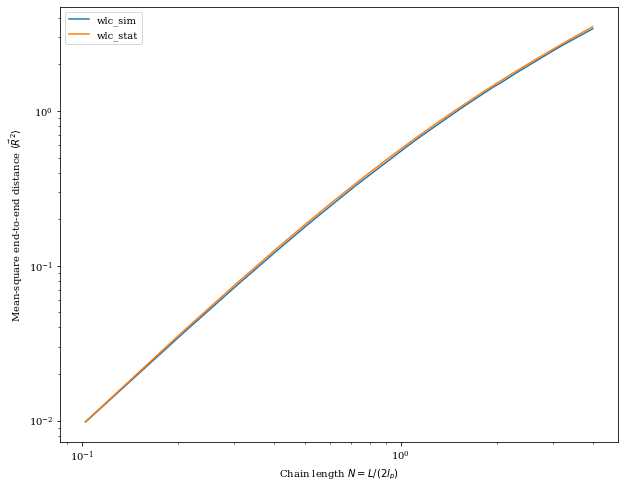

'\nISSUES:\n1 bead spacing squared = 0.174 simulation units\nmean square end-to-end distance of 2 bead polymer (1 jump) = 0.162 sim units\n\nHow much error is expected?\n'

In [21]:

#get wlc_sim r2 output normailized
nondimensionalization_constant = (2*no_interactions.persistence_length)**2
sim_r2_vals = r2_ave_vect[1:]/nondimensionalization_constant # nondimensionalized <r^2>

#get polymer lengths in terms of kuhn lengths (x-axis of plot)
bead_spacing = 16.26/39        # WLC_P__L / (WLC_P_NB - 1) == polymer length / num beads - 1. in simulation units 
bead_spacing_nm = bead_spacing * 28.7 # 1 simulation unit = 28.7 nm

sim_chain_lengths = np.zeros(39)
for i in range(1, 40):
    sim_chain_lengths[i-1] = bead_spacing_nm * i
    
length_kuhn = sim_chain_lengths / (2 * no_interactions.persistence_length * 28.7) #chain lengths from nm to Kuhn

#get wlc_stat r2 output
dimensions = 3
stat_r2_vals = wlcave.r2_ave(length_kuhn, dimensions)

#plot
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 10}
plt.rc('font', **font)
plt.loglog(length_kuhn, sim_r2_vals, label="wlc_sim") #WLC SIM
plt.loglog(length_kuhn, stat_r2_vals, label="wlc_stat")  #WLC STAT
#print("sim chain lenghts: ", sim_chain_lengths)
#print("sim r2 vals: ", sim_r2_vals)
plt.xlabel(r'Chain length $N = L/(2l_{p})$')# $N = L/(2l_{p})$')
plt.ylabel(r'Mean-square end-to-end distance $\langle \vec{R}^{2} \rangle$')
#plt.tight_layout()
plt.legend()
plt.show()

'''
ISSUES:
from wlcsim defines: 1 bead spacing squared = 0.174 simulation units
mean square end-to-end distance of 2 bead polymer (1 jump) = 0.162 sim units

How much error is expected?
'''

Radius of Gyration:

In [31]:
'''
Determine the mean square radius of gyration
Input: PolymerNetwork
       int skip_parameter: ratio of how many non-overlapping jumps of size d to skip when calculating the mean square 
       displacemnt between two beads distance d away. 1 means include all non-overlapping jumps,
       2 means every other, 3 means every third, etc.
Return: A DataFrame where the columns are a specific polymer in the network, rows are the size (number of bonds)
        of a given subpolymer,
        and the values are average radii of gyration of non-overlapping subpolymers of 
        a given size(averaged over all different jumps of that size possible in the polymer)

'''
def rg2(polymer_network, skip_parameter=1):
        
    num_poly = len(polymer_network.polymer_list)
    rg2_all_pos_polymers = pd.DataFrame(index=range(polymer_network.beads_per_polymer), columns=range(num_poly))
    
    for i, poly in enumerate(polymer_network.polymer_list):
        # creating array of square radii of gyrations for a given polymer (and all possible subpolymers)
        rg2_all_pos_polymers[i] = create_polymer_rg2_array(poly)
        
        if (i % 250 == 0):
            print("processed polymer " + str(i))
    
    #average the radii across all dif polymers in network
    num_beads = polymer_network.beads_per_polymer
    rg2_ave_vect = np.zeros(num_beads)
    for i in range(num_beads):
        row_avg = np.average(rg2_all_pos_polymers.iloc[i]) # average size i jump over all polymers
        rg2_ave_vect[i] = row_avg
    
    return rg2_ave_vect, rg2_all_pos_polymers


def create_polymer_rg2_array(polymer):
    '''
    Populates an array with the average radii of gyration squared of the polymer and every possible non-overlapping
    subpolymer

    The index of the array indicates the size of the subpolymer (# of bonds), so that
    the value at an index i is average radius of gyration of non-overlapping subpolymers of size i
    '''
    num_beads = len(polymer.bead_list)                         
    rg2_subpolymers = np.zeros(num_beads)     
    
    for d in range(1, num_beads+1):   # for all sub polymer sizes  WAS NUM_BEADS-1
        for i in range(0, num_beads, d): #for all non-overlapping subpolymers. d = num beads in subpolymer
            sub_bead_list = polymer.bead_list[i:i + d]
            if len(sub_bead_list) == d:
                sub_polymer = Polymer(sub_bead_list)
                radius_g_2 = sub_polymer.Radius_of_gyration_2()                 
                num_subpolymers = num_beads//d
                rg2_subpolymers[d-1] += radius_g_2/(num_subpolymers)
                
    return rg2_subpolymers


In [32]:
# #create_polymer_rg2_array logic
# polymer = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# num_beads = len(polymer)
# for d in range(1, num_beads+1):
#     print("d = ", d)
#     for i in range(0, num_beads, d):
#         sub_bead_list = polymer[i:i + d]
#         print("subpolymer: ", sub_bead_list)

In [33]:
rg2_ave_vect, result = rg2(no_interactions)

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib

processed polymer 0
processed polymer 250
processed polymer 500
processed polymer 750
processed polymer 1000
processed polymer 1250
processed polymer 1500
processed polymer 1750


In [25]:
result


C:\Users\tmhab\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:262: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:1375: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:1418: RuntimeWarning: divide by zero encountered in absolute
  abs_vals = np.abs(self.values)
C:\Users\tmhab\anaconda3\lib\site-packages\pandas\io\formats\format.py:1422: RuntimeWarning: divide by zero encountered in greater
  has_large_values = (abs_vals > 1e6).any()
C:\Users\t

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.041412,0.036620,0.041449,0.042382,0.040465,0.039344,0.040801,0.037810,0.042891,0.040639,...,0.038705,0.039252,0.042224,0.041275,0.042304,0.042607,0.042140,0.041594,0.040682,0.042920
2,0.094731,0.092401,0.101459,0.105937,0.101563,0.100917,0.098338,0.097702,0.104776,0.102127,...,0.090467,0.107590,0.104220,0.102335,0.099744,0.097585,0.108670,0.107856,0.109915,0.106987
3,0.180465,0.167416,0.181453,0.176562,0.192914,0.170524,0.183697,0.171097,0.190140,0.184094,...,0.166607,0.189848,0.185881,0.185686,0.190267,0.180303,0.186162,0.186688,0.204668,0.192674
4,0.278935,0.256651,0.262125,0.302886,0.283864,0.289613,0.282209,0.264236,0.292641,0.269456,...,0.280439,0.282624,0.265663,0.284374,0.279585,0.275653,0.282678,0.288557,0.303628,0.292783
5,0.367081,0.340213,0.395052,0.406057,0.412499,0.419704,0.369957,0.367465,0.374851,0.356883,...,0.375078,0.363284,0.390321,0.393603,0.412751,0.353686,0.389529,0.376297,0.419065,0.389275
6,0.529340,0.423712,0.529613,0.468248,0.534672,0.527843,0.522835,0.437695,0.524387,0.495741,...,0.489555,0.494773,0.542256,0.533545,0.599996,0.512002,0.581632,0.537261,0.538067,0.498173
7,0.640500,0.578313,0.690067,0.668281,0.643203,0.607892,0.651070,0.588086,0.732999,0.625794,...,0.634934,0.625010,0.651388,0.730114,0.705800,0.630391,0.682514,0.699127,0.685181,0.579425
8,0.812796,0.662582,0.767828,0.867041,0.827075,0.783673,0.767422,0.767979,0.781306,0.783361,...,0.852192,0.756681,0.788423,0.829898,0.873619,0.795429,0.938954,0.829134,0.788575,0.650042
9,0.886138,0.841877,0.918959,1.021824,0.967735,0.954957,0.928229,0.894274,0.951104,0.977118,...,1.034019,0.936591,0.907072,0.992576,1.042576,1.054628,0.984993,0.894993,1.071750,0.927744


In [26]:
print(rg2_ave_vect)

[0.         0.04040731 0.10179213 0.18226466 0.27989841 0.39231403
 0.51982947 0.65851077 0.80669431 0.9676535  1.13861614 1.31606095
 1.4998934  1.69045634 1.88960244 2.09485439 2.30403144 2.51682794
 2.7332337  2.95241728 3.16008644 3.38818565 3.61965442 3.85359044
 4.08894499 4.32646416 4.56609123 4.80893791 5.05380477 5.30120003
 5.55073075 5.80136448 6.05295435 6.30543541 6.55846534 6.81282365
 7.06752698 7.32329969 7.57951183 7.83693596]


C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:885: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:894: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:968: RuntimeWarning: divide

Plotting Simulation mean Rg^2 values vs wlc_stat ideal

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\Users\tmhab\wlcsim_membrane\wlcave.py:54: RuntimeWarning: divide by zero encountered in true_divide
  - length_kuhn ** -2 * (1 - np.exp(-(dimensions - 1) * length_kuhn)) / (dimensions - 1) ** 4)
C:\Users\tmhab\wlcsim_membrane\wlcave.py:54: RuntimeWarning: divide by zero encountered in subtract
  - length_kuhn ** -2 * (1 - np.exp(-(dimensions - 1) * length_kuhn)) / (dimensions - 1) ** 4)
C:\Users\tmhab\wlcsim_membrane\wlcave.py:54: RuntimeWarning: divide by zero encountered in reciprocal
  - length_kuhn ** -2 * (1 - np.exp(-(dimensions - 1) * length_kuhn)) / (dimensions - 1) ** 4)
C:\Users\tmhab\wlcsim_membrane\wlcave.py:54: RuntimeWarni

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2455: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(bb.intervaly).all():
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\ticker.py:2382: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(vmin) or not np.isfinite(vmax):
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\ticker.py:2394: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(minpos):
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2257: RuntimeWarning: divide by zero encountered in isfinite
  xfin = isfinite(x)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2258: RuntimeWarning: divide by zero encountered in isfinite
  yfin = isfinite(y)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in subtract
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:130: RuntimeWarning: divide by zero encountered in multiply
  stop  = asanyarray(stop)  * 1.0
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  delta = stop - start
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  step = delta / div
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:153: RuntimeWarning: divide by zero encountered in multiply
  y *= step
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:163: RuntimeWarning: divide by zero encountered in add
  y += start
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\legend.py:857: RuntimeWarning: divide by zero encountered in long_scalars
  for h, t in handles_and_labels[i0:i0 + di]]
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transfo

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\text.py:698: RuntimeWarning: divide by zero encountered in double_scalars
  x = x + posx
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\text.py:699: RuntimeWarning: divide by zero encountered in double_scalars
  y = y + posy
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\text.py:701: RuntimeWarning: divide by zero encountered in double_scalars
  y = canvash - y
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.round(x + ox + xd)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:161: RuntimeWarning: divide by zero encountered in double_scalars
  y = np.round(y - oy + yd)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:162: RuntimeWarning: divide by zero encountered in double_scalars
  self._renderer.draw_text_image(font_image, x, y + 1, angle, gc)
C:\Users\tmhab

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:714: RuntimeWarning: divide by zero encountered in maximum
  x0 = np.maximum(bbox1.xmin, bbox2.xmin)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:715: RuntimeWarning: divide by zero encountered in minimum
  x1 = np.minimum(bbox1.xmax, bbox2.xmax)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:716: RuntimeWarning: divide by zero encountered in maximum
  y0 = np.maximum(bbox1.ymin, bbox2.ymin)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:717: RuntimeWarning: divide by zero encountered in minimum
  y1 = np.minimum(bbox1.ymax, bbox2.ymax)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:4391: RuntimeWarning: divide by zero encountered in equal
  if np.all(clip_extent.extents == axbbox.extents):
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\spines.py:188: RuntimeWarning: divide by zero encountered in double_scalars
  bb0.x0 = bb0.x

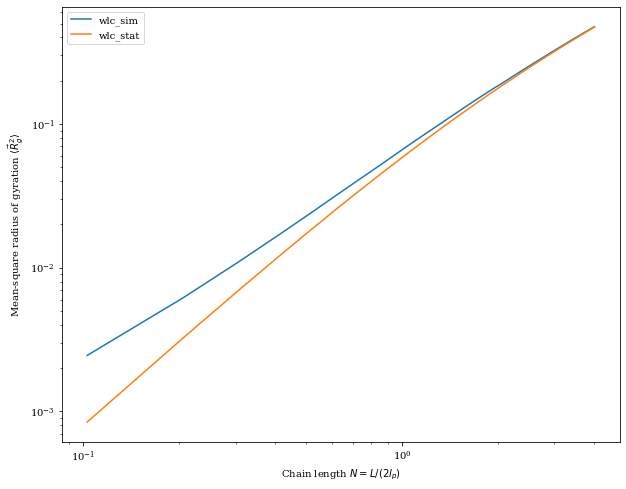

'\nISSUES:\nat low chain length, high error.\nHow much error is expected?\n'

In [27]:

#get wlc_sim rg2 output normailized
nondimensionalization_constant = (2*no_interactions.persistence_length)**2
sim_rg2_vals = rg2_ave_vect[1:]/nondimensionalization_constant # nondimensionalized <r^2>

#get polymer lengths in terms of kuhn lengths (x-axis of plot)
bead_spacing = 16.26/39        # WLC_P__L / (WLC_P_NB - 1) == polymer length / num beads - 1. in simulation units 
bead_spacing_nm = bead_spacing * 28.7 # 1 simulation unit = 28.7 nm

sim_chain_lengths = np.zeros(39)
for i in range(1, 40):
    sim_chain_lengths[i-1] = bead_spacing_nm * i
    
length_kuhn = sim_chain_lengths / (2 * no_interactions.persistence_length * 28.7) #chain lengths from nm to Kuhn

#get wlc_stat rg2 output
dimensions = 3
stat_rg2_vals = wlcave.rg2_ave(length_kuhn, dimensions)

#plot
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 10}
plt.rc('font', **font)
plt.loglog(length_kuhn, sim_rg2_vals, label="wlc_sim") #WLC SIM
plt.loglog(length_kuhn, stat_rg2_vals, label="wlc_stat")  #WLC STAT
#print("sim chain lenghts: ", sim_chain_lengths)
#print("sim r2 vals: ", sim_r2_vals)
plt.xlabel(r'Chain length $N = L/(2l_{p})$')# $N = L/(2l_{p})$')
plt.ylabel(r'Mean-square radius of gyration $\langle \vec{R}_g^{2} \rangle$')
#plt.tight_layout()
plt.legend()
plt.show()
'''
ISSUES:
at low chain length, high error.
How much error is expected?
'''